# Bank Marketing Dataset

**Abstract**
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

**Data Set Information**
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

## Attribute information

| **Feature**        | **Definition**                                                                                                                                            | **Type**                                                                                                 |
|--------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------|
| `Age`              | Customer's age                                                                                                                                           | Numeric: '59','34','32'                                                                                  |
| `Job`              | Customer's job                                                                                                                                           | Categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired'..                  |
| `Marital`          | Customer's marital status                                                                                                                                | Categorical: 'divorced','married','single','unknown'                                                     |
| `Education`        | Customer education level                                                                                                                                 | Categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown' |
| `Default`          | Has credit in default?                                                                                                                                   | Categorical: 'no','yes','unknown'                                                                        |
| `Housing`          | Does the client have a housing loan?                                                                                                                      | Categorical: 'no','yes','unknown'                                                                        |
| `Loan`             | Does the customer have a personal loan?                                                                                                                   | Categorical: 'no','yes','unknown'                                                                        |
| `Contact`          | Customer's contact type                                                                                                                                  | Categorical: 'cellular','telephone'                                                                      |
| `Month`            | Last contact month of the year                                                                                                                            | Categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec'                                                      |
| `day_of_week`      | Last contact day of the week                                                                                                                              | Categorical: 'mon','tue','wed','thu','fri'                                                               |
| `Campaign`         | Number of contacts performed during this campaign and for this customer                                                                                   | Numeric (999 means client wasn't previously contacted)                                                   |
| `Pdays`            | Number of days since the customer was last contacted from a previous campaign                                                                             | Numeric (probably -1 means the customer has not been contacted before)                                    |
| `Duration`         | Last contact time, in seconds                                                                                                                             | Numeric                                                                                                  |
| `Previous`         | Number of contacts performed before this campaign and for this customer                                                                                   | Numeric                                                                                                  |
| `Poutcome`         | Result of previous marketing campaign                                                                                                                     | Categorical: 'failure','nonexistent','success'                                                           |
| `emp.var.rate`     | Employment Variation Rate: This rate indicates the change in employment levels over time, usually expressed as a percentage. A positive value indicates an increase in employment, while a negative value indicates a decrease. | Quarterly indicator (numeric)                                                                            |
| `cons.price.idx`   | Consumer Price Index (CPI): The CPI reflects the price level of a predetermined basket of consumer goods and services purchased by households.            | Monthly indicator (numeric)                                                                              |
| `cons.conf.idx`    | Consumer Confidence Index (CCI): The CCI reflects consumers' perceptions of current economic conditions and their outlook for the future. A higher index value indicates greater confidence. | Monthly indicator (numeric)                                                                              |
| `euribor3m`        | Euribor 3-month Rate: The Euribor 3-month rate specifically refers to the interest rate for a three-month period.                                         | Daily indicator (numeric)                                                                                |
| `nr.employed`      | Number of employees                                                                                                                                      | Quarterly indicator (numeric)                                                                            |
| `subscribed` (y)   | Has the customer subscribed to a time deposit?                                                                                                            | Binary: 'yes','no'                                                                                       |


<a id="import"></a>
# <p style="background-color:tomato; font-family:calibri; font-size:130%; color:white; text-align:center; border-radius:40px 40px; padding:15px">Step 1: Import Libraries</p>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import roc_auc_score
from scipy.stats import skew, kurtosis
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.utils import shuffle

from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import time
from sklearn.svm import LinearSVC

import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from scipy.stats import uniform

import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True) 

<a id="import"></a>
# <p style="background-color:tomato; font-family:calibri; font-size:130%; color:white; text-align:center; border-radius:40px 40px; padding:15px">Step 2: Read Dataset</p>

In [2]:
#Read the dataset
data = pd.read_csv("data/bank_marketing_dataset.csv",na_values = "unknown")
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


<a id="import"></a>
# <p style="background-color:tomato; font-family:calibri; font-size:130%; color:white; text-align:center; border-radius:40px 40px; padding:15px">Step 3: Data Cleaning</p>

In [3]:
#structural information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            40198 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
data.shape

(41188, 21)

In [5]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Summary:
    
Mean Age is aproximately 41 years old. (Minimum: 18 years old and Maximum: 95 years old.)

The mean balance is 1,528. However, the Standard Deviation (std) is a high number so we can understand through this

that the balance is heavily distributed across the dataset.

As the data information said it will be better to drop the duration column since duration is highly correlated in 

whether a potential client will buy a term deposit. 

In [6]:
data.describe(exclude=np.number)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,subscribed
count,40858,41108,39457,32591,40198,40198,41188,41188,41188,41188,41188
unique,11,3,7,2,2,2,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


## Missing data

In [7]:
# Calculate the percentage of missing values
missing_percent = (data.isnull().sum() / len(data)) * 100

# Print the missing values in percentage with two decimal places
print("Missing values (in percentage):")
print(missing_percent.apply(lambda x: '{:.2f}%'.format(x)))

Missing values (in percentage):
age                0.00%
job                0.80%
marital            0.19%
education          4.20%
default           20.87%
housing            2.40%
loan               2.40%
contact            0.00%
month              0.00%
day_of_week        0.00%
duration           0.00%
campaign           0.00%
pdays              0.00%
previous           0.00%
poutcome           0.00%
emp.var.rate       0.00%
cons.price.idx     0.00%
cons.conf.idx      0.00%
euribor3m          0.00%
nr.employed        0.00%
subscribed         0.00%
dtype: object


In [8]:
# Define the threshold for dropping columns (20%)
threshold = 20

# Filter columns with missing values exceeding the threshold
columns_to_drop = missing_percent[missing_percent > threshold].index

# Drop columns with missing values exceeding the threshold
data.drop(columns_to_drop, axis=1, inplace=True)

# Print the dropped columns
print("Dropped columns:")
print(columns_to_drop)

Dropped columns:
Index(['default'], dtype='object')


In [9]:
# Separate object data
object_data = data.select_dtypes(include=['object'])

# Initialize SimpleImputer with strategy='most_frequent'
imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer on object_data
imputer.fit(object_data)

# Impute missing values using the most frequent strategy
imputed_object_data = imputer.transform(object_data)

# Convert the result back to a DataFrame
imputed_object_df = pd.DataFrame(imputed_object_data, columns=object_data.columns)

# Merge the imputed object data back into the original DataFrame
data[object_data.columns] = imputed_object_df

In [10]:
data.isna().sum()

age               0
job               0
marital           0
education         0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
subscribed        0
dtype: int64

### data have 14 duplicated record

In [11]:
data.duplicated().sum()

14

In [12]:
data = data.drop_duplicates()

## Data Exploration & Feature Engineering

In [13]:
data.previous.value_counts()
#given the number of people performed for this customer before this campaign (max 7)

previous
0    35549
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: count, dtype: int64

In [14]:
# Define a dictionary to map values to categories
bin_mapping = {0: 'none', 1: 'once', 2: '>1', 3: '>1', 4: '>1', 5: '>1', 6: '>1', 7: '>1'}

# Map the values in the 'previous' column to categories
data['previous'] = data['previous'].map(bin_mapping)

### we noticed that 35,000 customers don't have any record of contacts performed before the current campaign, it implies that these customers are likely new or have not been engaged in previous campaigns.

In [15]:
# Calculate value counts
value_counts = data['previous'].value_counts().reset_index()
value_counts.columns = ['previous', 'count']

# Generate colors for the bars
colors = px.colors.qualitative.Plotly[:len(value_counts)]

# Create a horizontal bar plot
fig = go.Figure(go.Bar(
    x=value_counts['count'],
    y=value_counts['previous'],
    orientation='h',
    marker=dict(color=colors)
))

# Customize the layout
fig.update_layout(
    title='Count of contacts performed before campaign',
    xaxis_title='num of customers who called',
    yaxis_title='rate of Previous calls',
    bargap=0.1,
    width=800,
    height=400
)

# Show the plot
iplot(fig)

In [16]:
data["job"].value_counts()
# We reached the numbers according to occupations, out of 41188 customers; 10422
# of them are managers, 9254 of them are blue-collar, 6743 of them are technicians and so on. We divided into 12 groups

job
admin.           10748
blue-collar       9252
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: count, dtype: int64

In [17]:
# Define a dictionary mapping original job categories to merged categories
# Assuming low frequency col can be merged
job_merge_mapping = {
    'admin.': 'white_collar',
    'management': 'white_collar',
    'entrepreneur': 'entrepreneur',
    'self-employed': 'self-employed',
    'blue-collar': 'blue_collar',
    'technician': 'blue_collar',
    'services': 'blue_collar',
    'housemaid': 'blue_collar',  
    'unemployed': 'other', 
    'student': 'other'  
}
# Update the DataFrame column 'job' with the merged categories
data['job'] = data['job'].map(job_merge_mapping).fillna(data['job'])

In [18]:
data["marital"].value_counts()
# We reached the number of customers according to their marital status, from 41188 people;24928 of them are married, 
# 11568 of them are single, 4612 of them are divorced and 80 of them are widowed

marital
married     24999
single      11564
divorced     4611
Name: count, dtype: int64

In [19]:
data["education"].value_counts()
# We have reached the number of customers according to their education level; it consists of 8 different categories
# according to their education level.

education
university.degree      13893
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4175
basic.6y                2291
illiterate                18
Name: count, dtype: int64

In [20]:
# Define a dictionary mapping original education categories to merged categories
education_merge_mapping = {
    'university.degree': 'university',
    'high.school': 'high school',
    'basic.9y': 'basic',
    'basic.6y': 'basic',
    'basic.4y': 'basic',
    'professional.course': 'professional course',
}
# Remove the 'illiterate' category from the DataFrame
data = data[data['education'] != 'illiterate']
# Update the 'education' column with the merged categories
data['education'] = data['education'].map(education_merge_mapping).fillna(data['education'])

In [21]:
data["education"].value_counts()

education
university             13893
basic                  12511
high school             9512
professional course     5240
Name: count, dtype: int64

In [22]:
data["housing"].value_counts()
# We have reached the numbers in 2 different categories for housing loan status (does it exist or not)

housing
yes    22550
no     18606
Name: count, dtype: int64

In [23]:
data["loan"].value_counts()
# Numbers in 2 different categories (yes/no) for personal credit status (do you have/no)

loan
no     34911
yes     6245
Name: count, dtype: int64

In [24]:
data["poutcome"].value_counts()
# Numbers in 3 different categories (nonexistent/failure/success) for 

poutcome
nonexistent    35533
failure         4251
success         1372
Name: count, dtype: int64

In [25]:
# target (imbalanced)
data["subscribed"].value_counts()
# Customer deposit subscription status, 36548 subscribed, 4640 unsubscribed

subscribed
no     36521
yes     4635
Name: count, dtype: int64

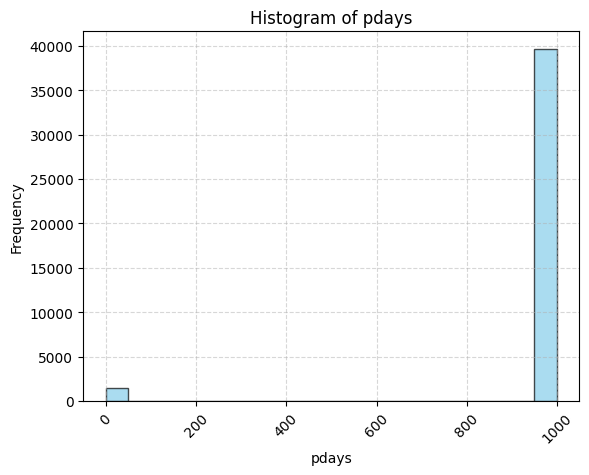

In [26]:
# Styling parameters
hist_kwargs = {
    'color': 'skyblue',  # Set the color of the bars
    'alpha': 0.7,        # Set the transparency of the bars
    'edgecolor': 'black' # Set the color of the edges of the bars
}

# Plot histogram
plt.hist(data['pdays'], bins=20, **hist_kwargs)

# Add title and labels
plt.title('Histogram of pdays')
plt.xlabel('pdays')
plt.ylabel('Frequency')

# Customize grid and ticks
plt.grid(True, linestyle='--', alpha=0.5)  # Add grid lines
plt.tick_params(axis='x', rotation=45)      # Rotate x-axis labels for better readability

# Show plot
plt.show()

In [27]:
# make this col cat to reduce the low freq cat
data.loc[data['pdays'] == 999, 'pdays'] = 'none'
data.loc[data['pdays'] != 'none', 'pdays'] = 'contacted'

In [28]:
data["pdays"].value_counts()
# num of cust not concated is >> who contacted

pdays
none         39642
contacted     1514
Name: count, dtype: int64

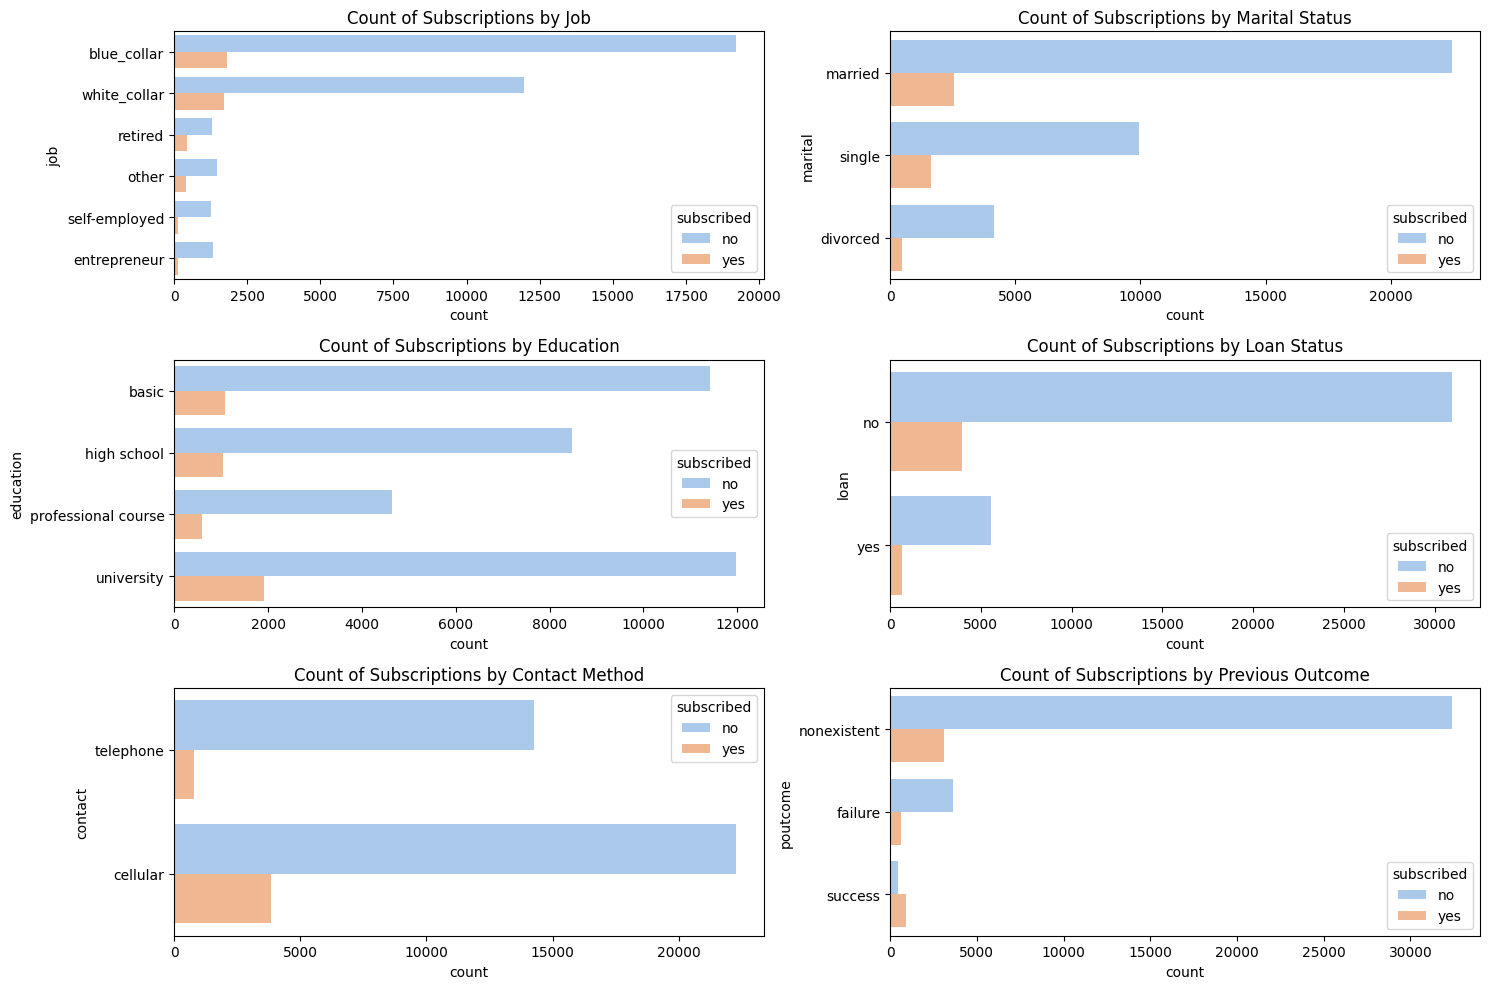

In [29]:
# Create a figure and subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 10))

# Plot countplot for 'job'
sns.countplot(y='job', hue='subscribed', data=data, palette='pastel', ax=axes[0, 0])
axes[0, 0].set_title('Count of Subscriptions by Job')

# Plot countplot for 'marital'
sns.countplot(y='marital', hue='subscribed', data=data, palette='pastel', ax=axes[0, 1])
axes[0, 1].set_title('Count of Subscriptions by Marital Status')

# Plot countplot for 'education'
sns.countplot(y='education', hue='subscribed', data=data, palette='pastel', ax=axes[1, 0])
axes[1, 0].set_title('Count of Subscriptions by Education')

# Plot countplot for 'loan'
sns.countplot(y='loan', hue='subscribed', data=data, palette='pastel', ax=axes[1, 1])
axes[1, 1].set_title('Count of Subscriptions by Loan Status')

# Plot countplot for 'contact'
sns.countplot(y='contact', hue='subscribed', data=data, palette='pastel', ax=axes[2, 0])
axes[2, 0].set_title('Count of Subscriptions by Contact Method')

# Plot countplot for 'poutcome'
sns.countplot(y='poutcome', hue='subscribed', data=data, palette='pastel', ax=axes[2, 1])
axes[2, 1].set_title('Count of Subscriptions by Previous Outcome')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [30]:
data.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'subscribed'],
      dtype='object')

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41156 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41156 non-null  int64  
 1   job             41156 non-null  object 
 2   marital         41156 non-null  object 
 3   education       41156 non-null  object 
 4   housing         41156 non-null  object 
 5   loan            41156 non-null  object 
 6   contact         41156 non-null  object 
 7   month           41156 non-null  object 
 8   day_of_week     41156 non-null  object 
 9   duration        41156 non-null  int64  
 10  campaign        41156 non-null  int64  
 11  pdays           41156 non-null  object 
 12  previous        41156 non-null  object 
 13  poutcome        41156 non-null  object 
 14  emp.var.rate    41156 non-null  float64
 15  cons.price.idx  41156 non-null  float64
 16  cons.conf.idx   41156 non-null  float64
 17  euribor3m       41156 non-null  floa

In [32]:
num_list = data.select_dtypes(exclude=['object']).columns.tolist()
num_list

['age',
 'duration',
 'campaign',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

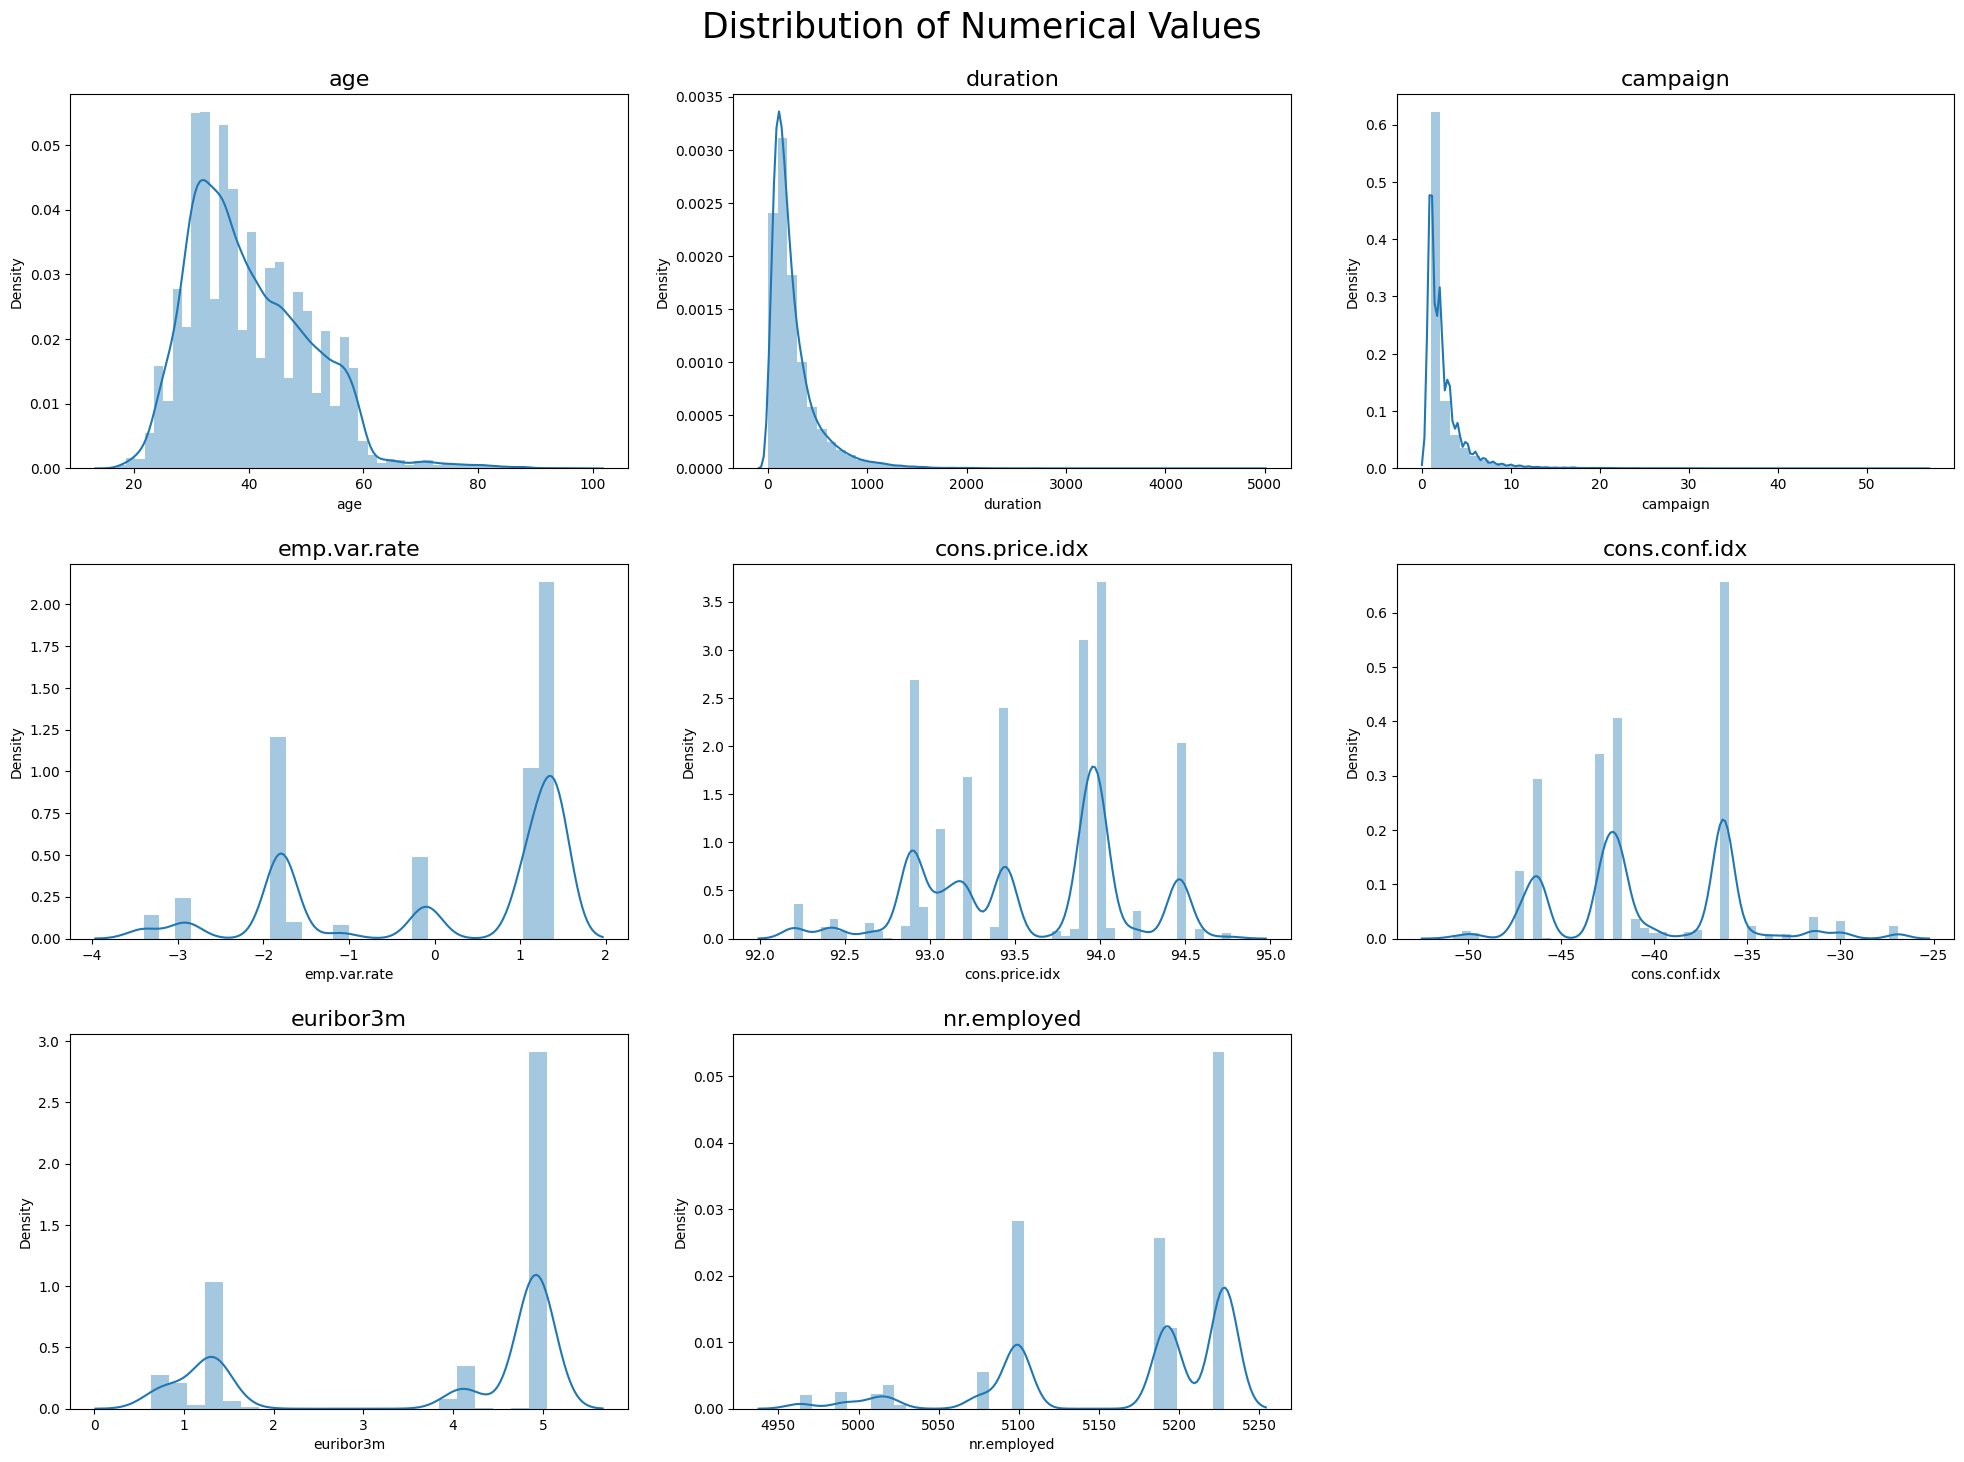

In [33]:
# Before querying for outliers, let's examine the distributions of numeric variables
k = 1
plt.figure(figsize=(20, 15))
plt.suptitle("Distribution of Numerical Values", fontsize=25)

for i in num_list:
    plt.subplot(3, 3, k)
    sns.distplot(data[i].dropna()) 
    plt.title(i, fontsize=16)
    k += 1

plt.tight_layout(pad=2.0)
plt.show()

In [34]:
# Original skewness and kurtosis
print("Original Skewness and Kurtosis:")
for column in num_list:
    skewness = skew(data[column])
    kurt = kurtosis(data[column])
    print(f"Feature: {column}")
    print(f"Skewness: {skewness}")
    print(f"Kurtosis: {kurt}")
    print("\n")

Original Skewness and Kurtosis:
Feature: age
Skewness: 0.7844925612723632
Kurtosis: 0.7902274119219275


Feature: duration
Skewness: 3.2633837341496568
Kurtosis: 20.25227754249667


Feature: campaign
Skewness: 4.761563347039445
Kurtosis: 36.958881583166054


Feature: emp.var.rate
Skewness: -0.7240221277352606
Kurtosis: -1.0627173577506202


Feature: cons.price.idx
Skewness: -0.23052842412219585
Kurtosis: -0.8306348875779155


Feature: cons.conf.idx
Skewness: 0.3028769705249583
Kurtosis: -0.3587828007576319


Feature: euribor3m
Skewness: -0.7091229471569048
Kurtosis: -1.4068514661306404


Feature: nr.employed
Skewness: -1.0443020856272278
Kurtosis: -0.0036954662307788766




all our distributions are skewed

In [35]:
# saving our col with outliers to fix later
out_list = []

for i in num_list:
    Q1 = data[i].quantile(0.25)
    Q3 = data[i].quantile(0.75)
    IQR = Q3 - Q1
    up = Q3 + 1.5 * IQR
    low = Q1 - 1.5 * IQR

    if (data.loc[(data[i] > up) | (data[i] < low)]).any(axis=None):
        print(i, "yes")
        out_list.append(i)  # Add the column name to out_list
    else:
        print(i, "no")

print("Columns with outliers:", out_list)

age yes
duration yes
campaign yes
emp.var.rate no
cons.price.idx no
cons.conf.idx yes
euribor3m no
nr.employed no
Columns with outliers: ['age', 'duration', 'campaign', 'cons.conf.idx']


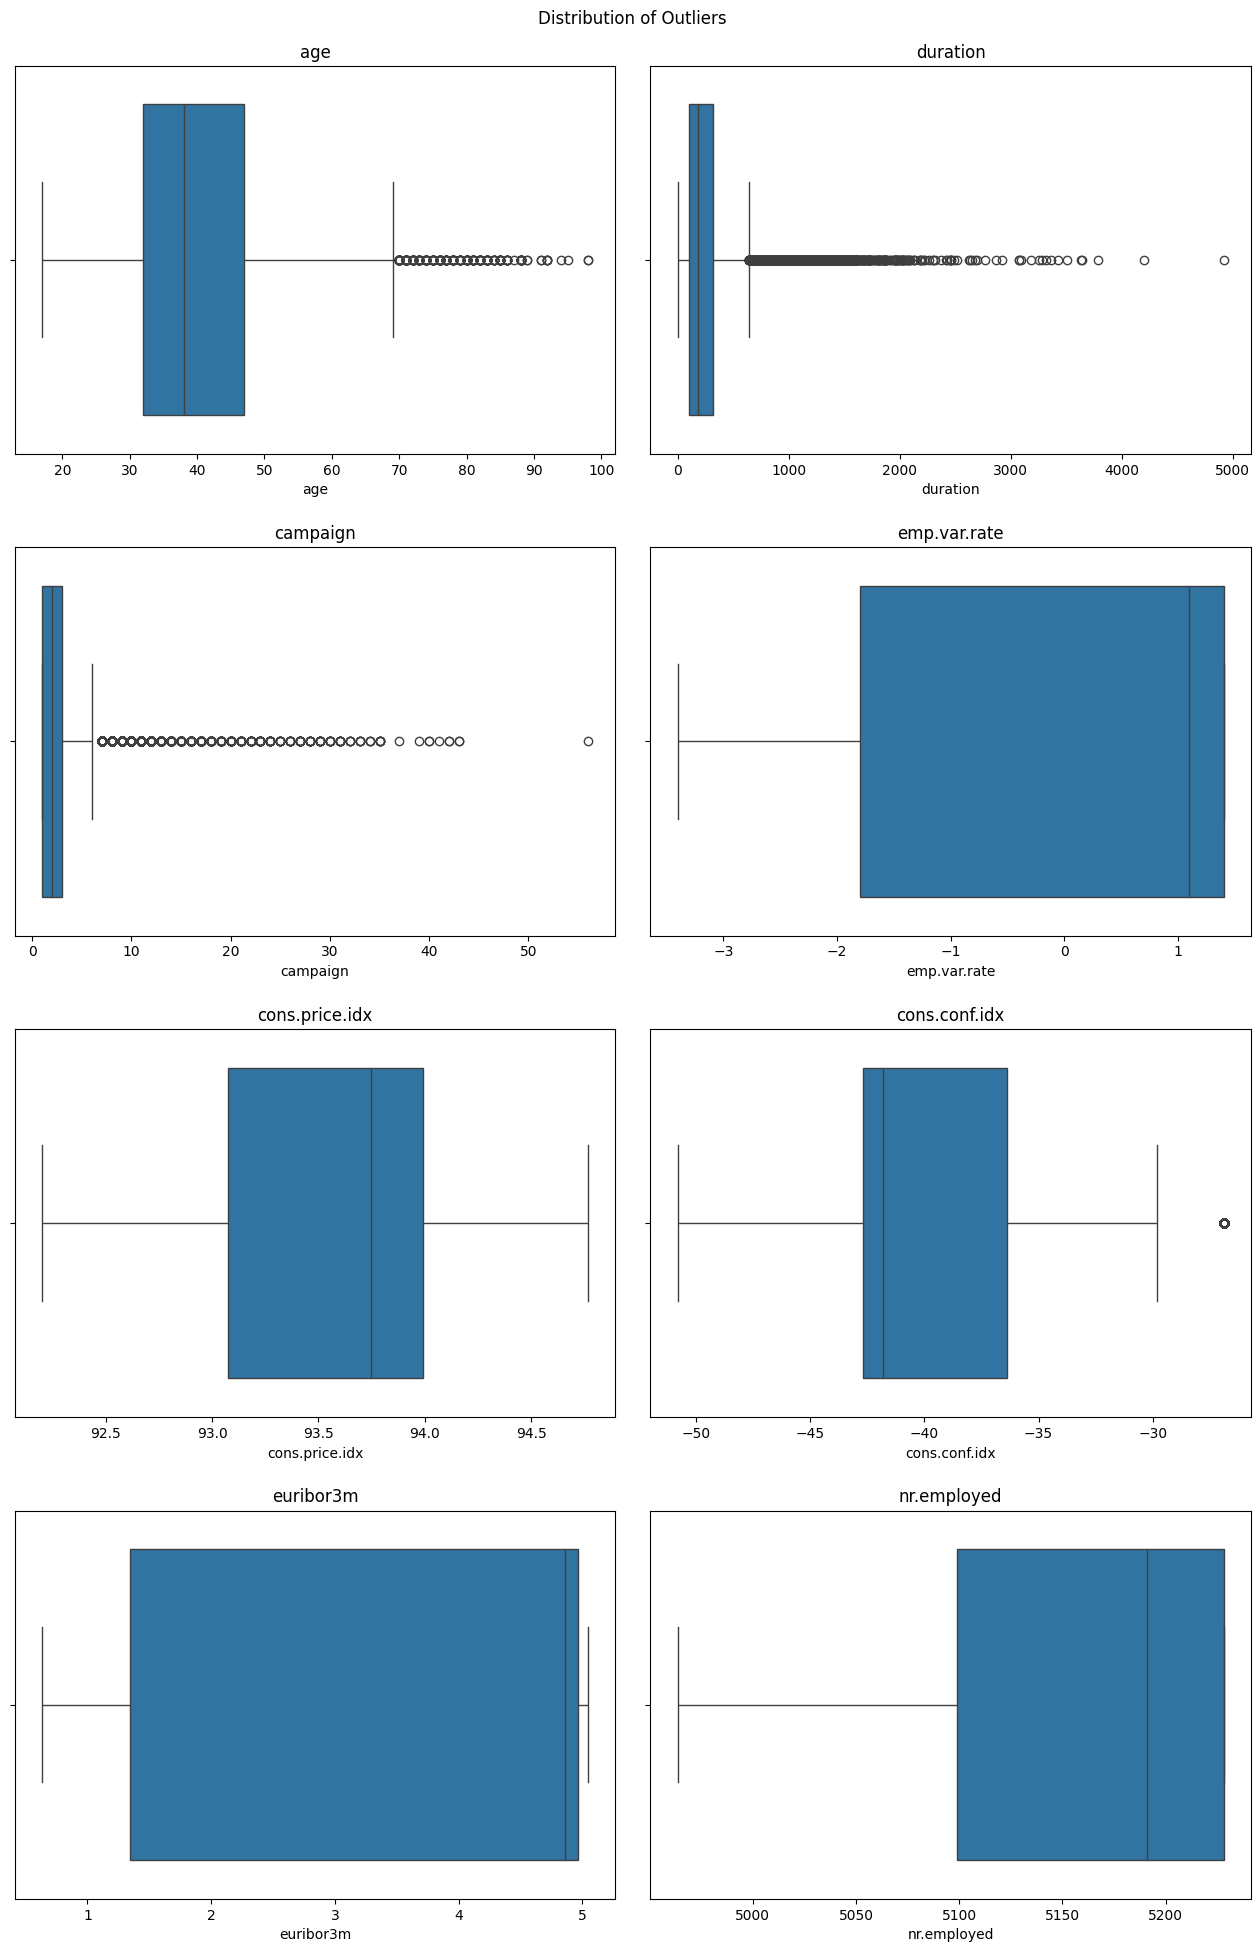

In [36]:
k=1
plt.figure(figsize=(13,20))
plt.suptitle("Distribution of Outliers")
for i in data.loc[:,num_list]:
    plt.subplot(4,2,k)
    sns.boxplot(x = i, data = data.loc[:,num_list])
    plt.title(i)
    k+=1
plt.tight_layout(pad=2.0)
plt.show()

our outliers seem to be too many, let's look at their statistical status before removing outliers

In [37]:
data.describe()
#We have examined the cases of outliers, now let's fix them
# we looked at the distribution status of the data, let's remove outliers for age and duration, other variables don't make much sense

,age,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41156.000000,41156.000000,41156.000000,41156.000000,41156.000000,41156.000000,41156.000000,41156.000000
mean,40.019876,258.315555,2.568082,0.081959,93.575826,-40.503312,3.621277,5167.030729
std,10.418974,259.292405,2.770772,1.570844,0.578807,4.627652,1.734452,72.256706
min,17.000000,0.000000,1.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


we looked at the distribution status of the data, let's remove outliers for out_list

In [38]:
for i in data.loc[:,out_list]:
    Q1 = data[i].quantile(0.25)
    Q3 = data[i].quantile(0.75)
    IQR = Q3 - Q1
    up_lim = Q3 + 1.5 * IQR
    low_lim = Q1 - 1.5 * IQR
    data.loc[data[i] > up_lim,i] = up_lim
    data.loc[data[i] < low_lim,i] = low_lim
for i in data.loc[:,out_list]:
    Q1 = data[i].quantile(0.25)
    Q3 = data[i].quantile(0.75)
    IQR = Q3-Q1
    up = Q3 + 1.5*IQR
    low = Q1 - 1.5*IQR

    if data[(data[i] > up) | (data[i] < low)].any(axis=None):
        print(i,"yes")
    else:
        print(i, "no")

age no
duration no
campaign no
cons.conf.idx no


In [39]:
# We have removed the outliers, let's take a look at the statistical information again;
data.describe()

,age,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41156.000000,41156.000000,41156.000000,41156.000000,41156.000000,41156.000000,41156.000000,41156.000000
mean,39.935526,235.027857,2.275561,0.081959,93.575826,-40.503854,3.621277,5167.030729
std,10.127746,177.362147,1.550682,1.570844,0.578807,4.626062,1.734452,72.256706
min,17.000000,0.000000,1.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,69.500000,644.500000,6.000000,1.400000,94.767000,-26.950000,5.045000,5228.100000


maximum talk time (duration) in secs from 4918 to 644.5, on the other hand, there were big changes in standard deviations

## Applying Data Normalization

In data preprocessing for machine learning tasks, normalization is a common technique used to scale numerical features to a similar range. This helps ensure that features with different scales contribute equally to the learning process and prevents certain features from dominating due to their larger scales.

### Min-Max Scaling

One popular normalization method is Min-Max scaling, which scales the values to a fixed range, typically [0, 1]. This is achieved by subtracting the minimum value and dividing by the range (maximum - minimum) of each feata[num_list])


In [40]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Normalize the numerical columns in num_list
data[num_list] = scaler.fit_transform(data[num_list])

apply data normalization to ensure data that data is noramlly distributed

# Data Visualization

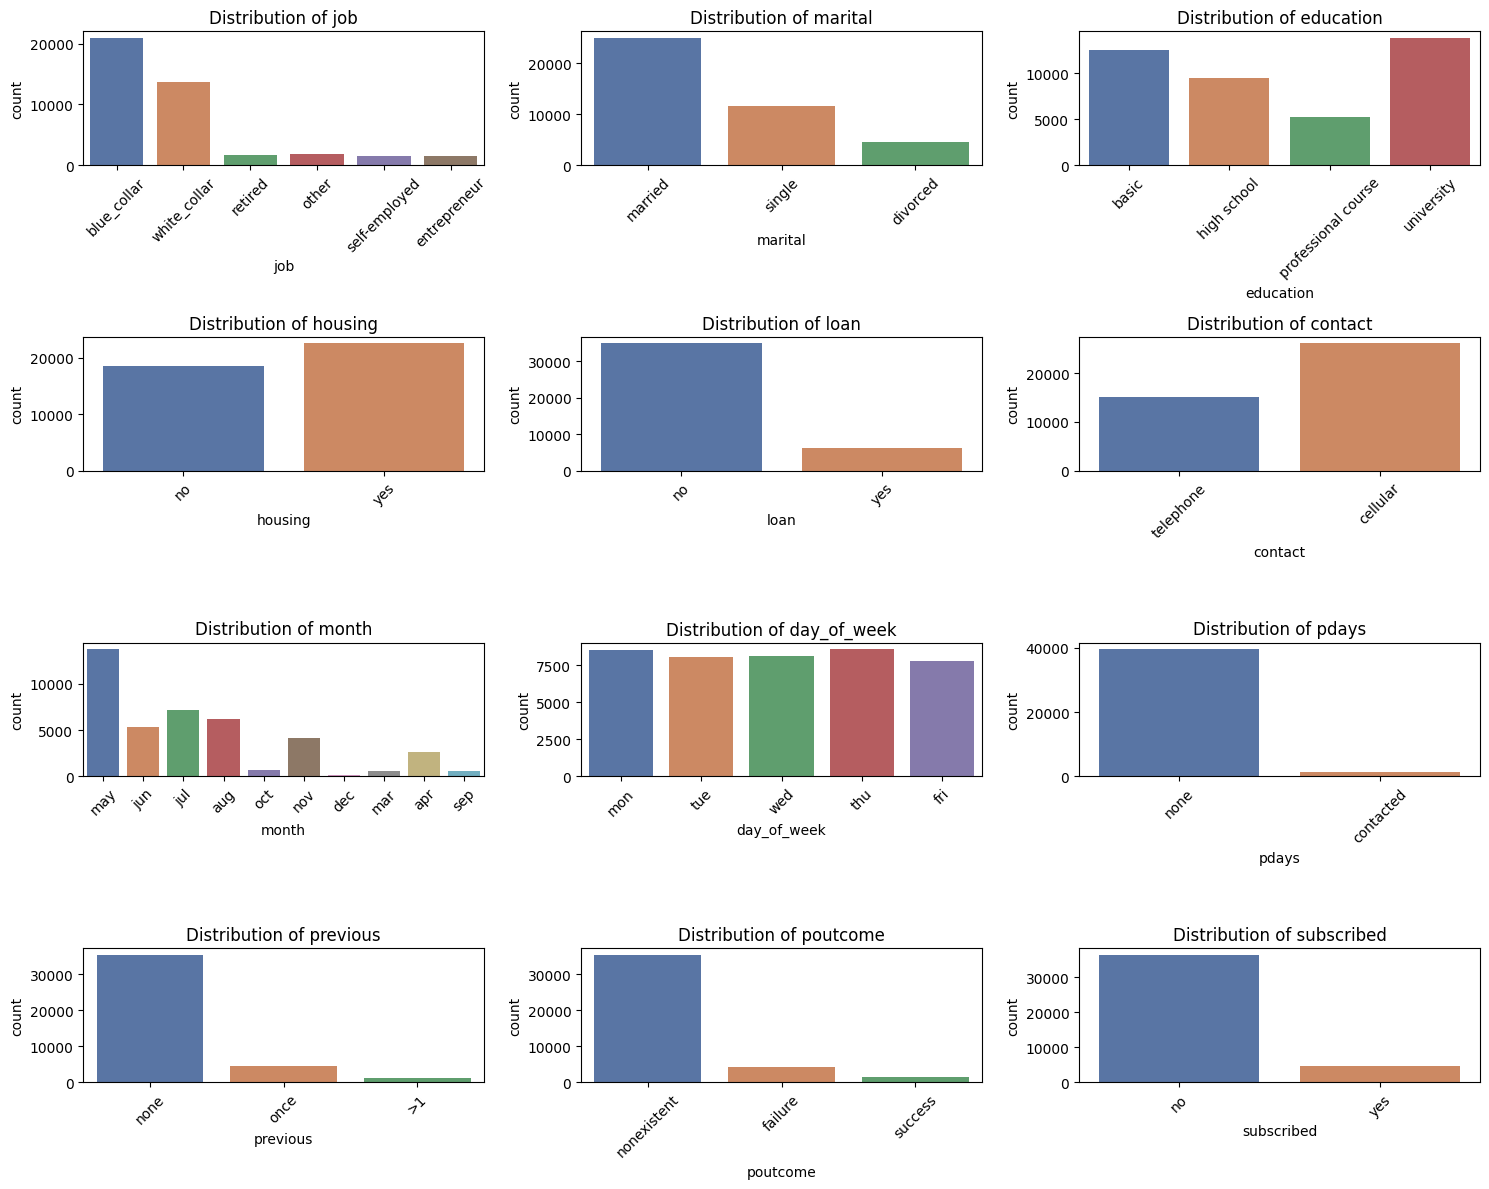

In [41]:
# Select categorical variables for bar charts
categorical_variables = data.select_dtypes(include=['object'])

# Define a color palette for the bar charts
palette = sns.color_palette("deep")

# Creating bar charts to visualize the distribution for the categorical variables
plt.figure(figsize=(15, 12))
for i, var in enumerate(categorical_variables):
    plt.subplot(4, 3, i + 1)
    sns.countplot(x=var, data=data, palette=palette)
    plt.title(f'Distribution of {var}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

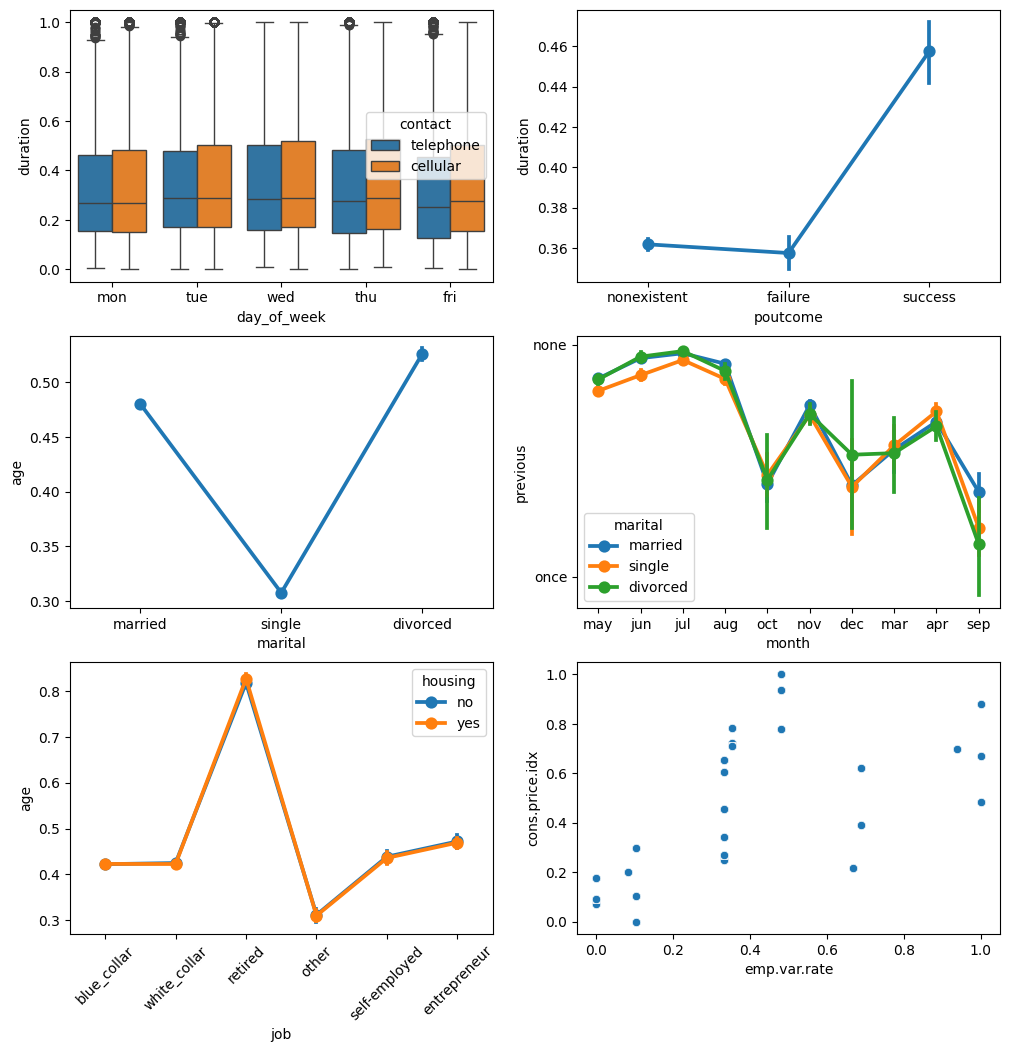

In [42]:
plt.figure(figsize=(12,12))
plt.subplot(3,2,1)
sns.boxplot(x ='day_of_week',y ='duration', data = data,hue="contact")
plt.subplot(3,2,2)
sns.pointplot(x ='poutcome',y ='duration', data = data)
plt.subplot(3,2,3)
sns.pointplot(x ='marital',y ='age', data = data)
plt.subplot(3,2,4)
sns.pointplot(x ='month',y ='previous', data = data,hue="marital")
plt.subplot(3,2,5)
sns.pointplot(x ='job',y ='age', data = data,hue="housing")
plt.xticks(rotation=45)
plt.subplot(3,2,6)
sns.scatterplot(x ='emp.var.rate',y ='cons.price.idx', data = data)
plt.show()

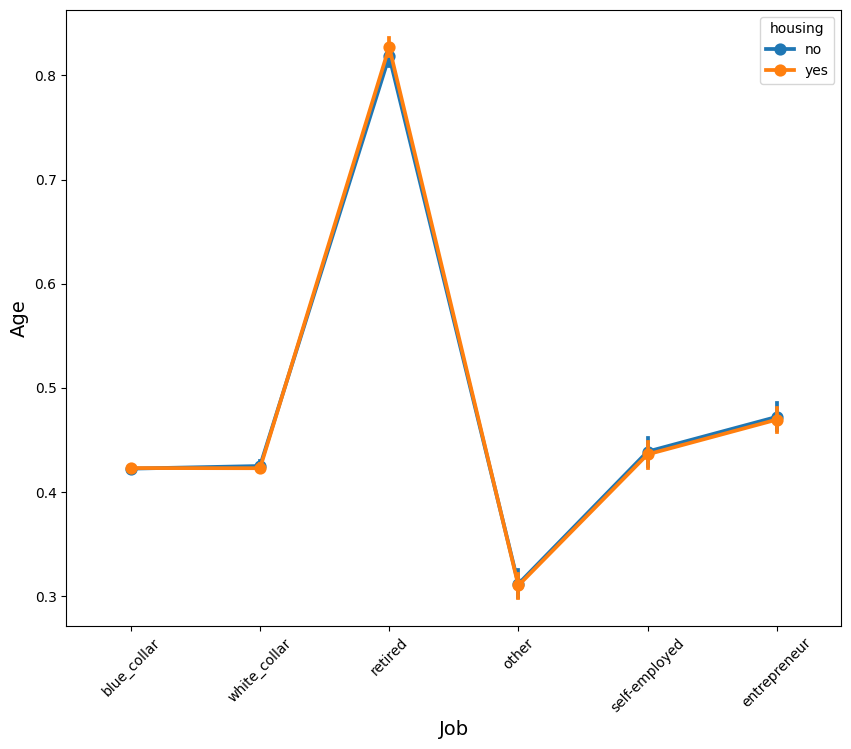

In [43]:
plt.figure(figsize=(10, 8))  
sns.pointplot(x='job', y='age', data=data, hue='housing')
plt.xlabel('Job', fontsize=14) 
plt.ylabel('Age', fontsize=14)  
plt.xticks(rotation=45)         
plt.show()

# Variable Transformation
do an label encoder operation to represent categorical values with numerical values;

In [44]:
data.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,0.742857,blue_collar,married,basic,no,no,telephone,may,mon,0.404965,0.0,none,none,nonexistent,0.9375,0.698753,0.603774,0.957379,0.859735,no
1,0.761905,blue_collar,married,high school,no,no,telephone,may,mon,0.231187,0.0,none,none,nonexistent,0.9375,0.698753,0.603774,0.957379,0.859735,no
2,0.380952,blue_collar,married,high school,yes,no,telephone,may,mon,0.350659,0.0,none,none,nonexistent,0.9375,0.698753,0.603774,0.957379,0.859735,no
3,0.438095,white_collar,married,basic,no,no,telephone,may,mon,0.234290,0.0,none,none,nonexistent,0.9375,0.698753,0.603774,0.957379,0.859735,no
4,0.742857,blue_collar,married,high school,no,yes,telephone,may,mon,0.476338,0.0,none,none,nonexistent,0.9375,0.698753,0.603774,0.957379,0.859735,no


In [45]:
# cat_data contains the categorical columns
cat_data = data.select_dtypes(include=['object'])

# Initialize LabelEncoder
lbe = LabelEncoder()

# Apply Label Encoding to each categorical column
for column in cat_data.columns:
    data[column] = lbe.fit_transform(data[column])

In [46]:
data.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,0.742857,0,1,0,0,0,1,6,1,0.404965,0.0,1,1,1,0.9375,0.698753,0.603774,0.957379,0.859735,0
1,0.761905,0,1,1,0,0,1,6,1,0.231187,0.0,1,1,1,0.9375,0.698753,0.603774,0.957379,0.859735,0
2,0.380952,0,1,1,1,0,1,6,1,0.350659,0.0,1,1,1,0.9375,0.698753,0.603774,0.957379,0.859735,0
3,0.438095,5,1,0,0,0,1,6,1,0.234290,0.0,1,1,1,0.9375,0.698753,0.603774,0.957379,0.859735,0
4,0.742857,0,1,1,0,1,1,6,1,0.476338,0.0,1,1,1,0.9375,0.698753,0.603774,0.957379,0.859735,0


we converted the variables to numeric variables (ex: 0 instead of no, 1 instead of yes etc.)

In [47]:
data["subscribed"].value_counts()
# Customer deposit subscription status, 36548 subscribed, 4640 unsubscribed

subscribed
0    36521
1     4635
Name: count, dtype: int64

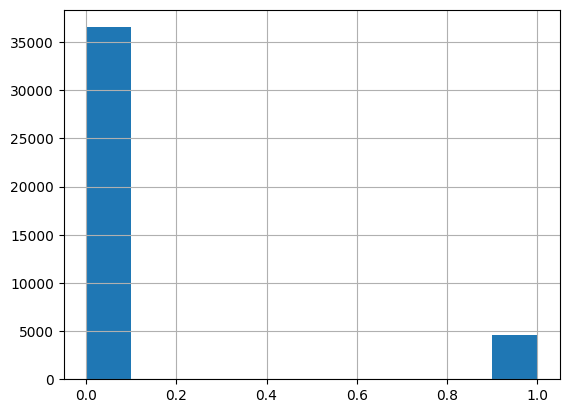

In [48]:
data['subscribed'].hist()
plt.show()

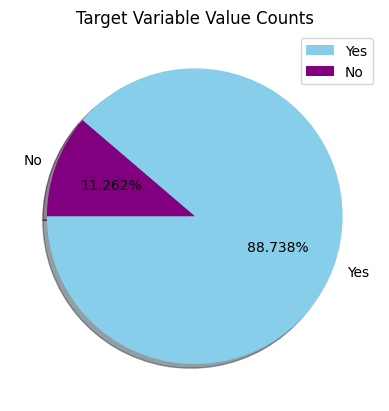

In [49]:
labels=data.subscribed.unique()

sizes=data.subscribed.value_counts().values
mycolors = ["skyblue", "purple"]
# plot the class value counts
fig, ax = plt.subplots()
ax.pie(sizes, labels=["Yes","No"], autopct='%1.3f%%',colors=mycolors,shadow=True,startangle = 180)
ax.set_title('Target Variable Value Counts')
plt.legend()
plt.show()

### The dataset is highly inbalanced

<a id="import"></a>
# <p style="background-color:tomato; font-family:calibri; font-size:130%; color:white; text-align:center; border-radius:40px 40px; padding:15px">Correcting the imbalance discovered by using resample
</p>

## Resampling is a technique used in machine learning and statistics to modify the composition of a dataset. It involves creating new samples by drawing randomly from the existing data points.

## Oversampling: This involves increasing the number of instances in the minority class (or less represented class) to balance the class distribution. It helps prevent bias in the model towards the majority class.¶

In [50]:
# Split Data¶
X = data.drop('subscribed',axis=1)
y = data[['subscribed']]

In [51]:
# X contains features and y contains the target variable
# Instantiate SMOTE
oversample = SMOTE()

# Apply SMOTE to X and y
X_resampled, y_resampled = oversample.fit_resample(X, y)

# Set the name for the target variable (y)
y_resampled.name = 'subscribed'

# Merge X and y again
datanew = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), y_resampled], axis=1)

# Shuffle the data
datanew = shuffle(datanew)

# Check the shape of the new dataset
print(f"The dataset now has {datanew.shape[0]} rows.")

The dataset now has 73042 rows.


In [52]:
datanew.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
35630,0.400000,0,1,0,1,0,0,6,1,0.276183,0.000000,1,1,1,0.333333,0.269680,0.192872,0.138291,0.512287,0
57950,0.285714,5,2,3,0,0,0,4,0,0.597174,0.000000,1,1,1,0.104167,0.296960,0.419287,0.143732,0.425709,1
56370,0.700008,0,1,0,1,0,0,0,1,0.354178,0.149972,1,1,1,0.348955,0.618810,0.431815,0.088601,0.207523,1
41202,0.448633,5,2,1,1,0,0,0,1,0.645436,0.110648,1,1,1,0.333333,0.340608,0.155136,0.169773,0.512287,1
68224,0.519523,0,1,0,1,0,0,6,3,0.571260,0.000000,0,0,2,0.333333,0.550838,0.383662,0.048485,0.261448,1


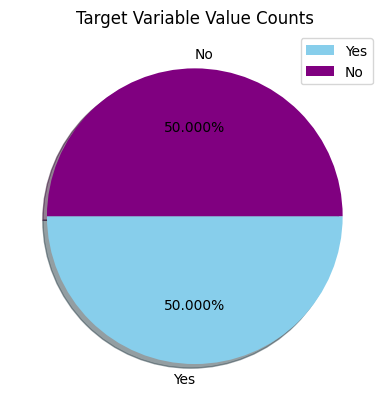

In [53]:
labels=datanew.subscribed.unique()

sizes=datanew.subscribed.value_counts().values
mycolors = ["skyblue", "purple"]
# plot the class value counts
fig, ax = plt.subplots()
ax.pie(sizes, labels=["Yes","No"], autopct='%1.3f%%',colors=mycolors,shadow=True,startangle = 180)
ax.set_title('Target Variable Value Counts')
plt.legend()
plt.show()

In [54]:
# Split Data¶
X = datanew.drop('subscribed',axis=1)
y = datanew[['subscribed']]

<a id="import"></a>
# <p style="background-color:tomato; font-family:calibri; font-size:130%; color:white; text-align:center; border-radius:40px 40px; padding:15px">Step 4: Feature Selection</p>

__Feature selection__ is the process of selecting a subset of relevant features for use in model building.

<h2 align="left"><font color='purple'>Advantages of Feature Selection:</font></h2>

1. __Enhanced Accuracy__: When there are fewer features, the model has fewer potential aspects to learn, which may lead to fewer errors being made when predicting new data.

2. __Improved Interpretability__: Feature selection helps to identify important features and also make a model more interpretable by removing redundant or irrelevant features from the data set.

3. __Faster Training Time__: Feature selection reduces the computational cost by reducing the number of computations that need to be performed in order to train and test the model. This, in turn, reduces training time and makes models more efficient.

4. __Reduced Overfitting__: By removing irrelevant and redundant features from data, feature selection can also help in reducing overfitting which can occur when too many variables are included in a model without sufficient observations or regularization techniques applied.

____
<h2 align="left"><font color='purple'>Feature Selection Methods:</font></h2>

> <h3 align="left"><font color='maroon'>I) Wrapper Methods:</font></h3> 
> These methods use a predictive model to score each subset of features and determine the importance of each feature. Most important wrapper methods are: 
>
> * __Forward Selection:__ Forward Selection is an iterative feature selection method that starts off with no features in the model and one by one adds the most predictive feature to the model, stopping when there is no improvement on a validation score. This process is repeated until certain criteria are met or all possible sets of features have been considered. By using a metric , the algorithm can identify which combinations of features best improve model performance. The result of Forward Selection is an ordered list that ranks the importance of each feature according to its contribution to improving model accuracy.
>
>
> * __Permutation:__ Permutation evaluates the influence of a given feature by shuffling its values and thereby creating a random permutation, measuring how much the model accuracy drops as consequence. The greater the drop in accuracy, the more important this feature proved to be for solving the task at hand.
>
>
> * __Drop-column:__ The idea is to calculate the model performance with all predictors and drop a single predictor and see the reduction in the performance. The more important the feature is, the larger the decrease we see in the model performance.


> <h3 align="left"><font color='maroon'>II) Filter Methods:</font></h3> 
> These methods use statistical measures such as:
>
> * __Correlation Coefficients__
> * __Information Gain__
> * __Chi-square Test__


> <h3 align="left"><font color='maroon'>III) Embedded Methods:</font></h3> 
> Embedded methods combine elements of both filter and wrapper approaches by constructing predictive models during the feature selection process in order to better evaluate potential features. Examples of embedded methods include: 
>
> * __LASSO Regression__
> * __Decision Trees__
> * __Random Forest__
> * __Gradient Boosting Machines (GBM)__

### Pearson Correlation

Pearson's correlation coefficient is the test statistics that measures the statistical relationship, or association, between two continuous variables. It gives information about the magnitude of the association, or correlation, as well as the direction of the relationship.

There are two types of correlations. __Positive Correlation:__ means that if feature A increases then feature B also increases or if feature A decreases then feature B also decreases. Both features move in tandem and they have a linear relationship. __Negative Correlation:__ means that if feature A increases then feature B decreases and vice versa.

If 2 or more independent features are highly correlated then they can be considered as duplicate features and can be dropped. When independent variables are highly correlated, change in one variable would cause change to another and so the model results fluctuate significantly. The model results will be unstable and vary a lot given a small change in the data or model. 

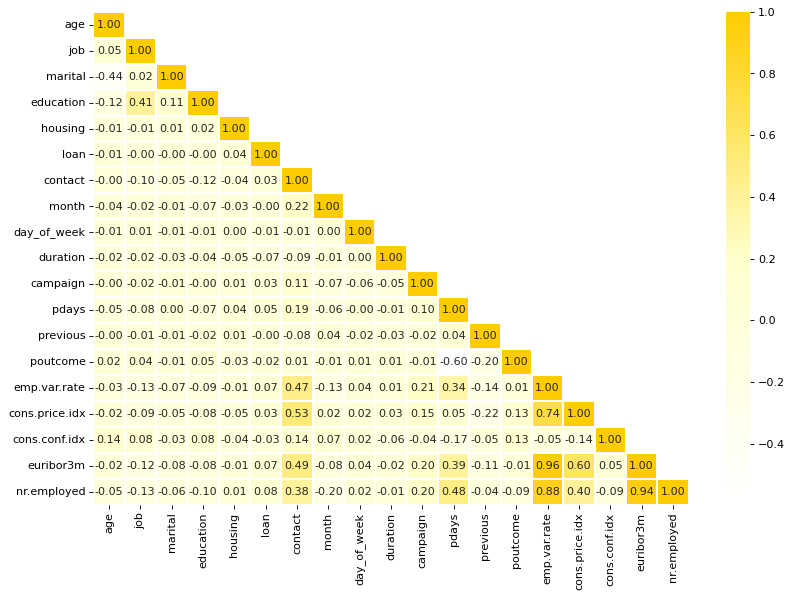

In [55]:
# Define a colormap
yellow = LinearSegmentedColormap.from_list('yellow', [(0, (1,1,1)), (0.5, (1,1,0.8)), (1, (1,0.8,0))])

# Create a mask so that we see the correlation values only once
mask = np.zeros_like(X.corr())
mask[np.triu_indices_from(mask,1)] = True

# Plot the heatmap correlation
plt.figure(figsize=(12,8), dpi=80)
sns.heatmap(X.corr(), mask=mask, annot=True, cmap=yellow, fmt='.2f', linewidths=0.2)
plt.show()

### Definition of some numerical features
* __euribor3m:__ euribor 3 month rate - daily indicator (numeric)
* __nr.employed:__ number of employees - quarterly indicator (numeric)
* __emp.var.rate:__ employment variation rate - quarterly indicator (numeric)
* __cons.price.idx:__ consumer price index - monthly indicator (numeric)

#### Insights:

The correlation is __extremely high__ between:

* euribor3m - nr_employed: __94.51%__
* euribor3m - emp_var_rate: __97.2256__
* nr_employed - emp_var_rate: __90.60%__
* emp_var_rate - cons_price_idx: __77.53%__

Which features to keep and which to disregard because of high correlation:

In [56]:
# If the correlation between two features is extremely high we will discard one of the features; to avoid multicollinearity.
columns = np.full((X.corr().shape[0],), True, dtype=bool)
for i in range(X.corr().shape[0]):
    for j in range(i+1, X.corr().shape[0]):
        if data.corr().iloc[i,j] >= 0.7:
            if columns[j]:
                columns[j] = False
                
                
numerical_selected_columns = X.corr().columns[columns]
numerical_selected_columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.conf.idx'],
      dtype='object')

We can see that
* __euribor3m__
* __nr.employed__
* __cons.price.idx__

are __not selected__

In [57]:
data_corr = X[numerical_selected_columns]
data_corr.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.conf.idx
35630,0.400000,0,1,0,1,0,0,6,1,0.276183,0.000000,1,1,1,0.333333,0.192872
57950,0.285714,5,2,3,0,0,0,4,0,0.597174,0.000000,1,1,1,0.104167,0.419287
56370,0.700008,0,1,0,1,0,0,0,1,0.354178,0.149972,1,1,1,0.348955,0.431815
41202,0.448633,5,2,1,1,0,0,0,1,0.645436,0.110648,1,1,1,0.333333,0.155136
68224,0.519523,0,1,0,1,0,0,6,3,0.571260,0.000000,0,0,2,0.333333,0.383662


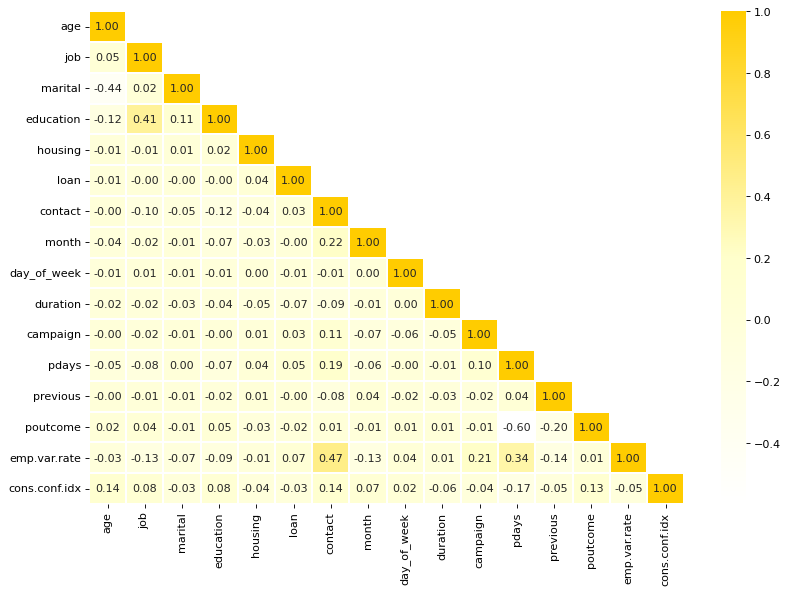

In [58]:
# Define a colormap
yellow = LinearSegmentedColormap.from_list('yellow', [(0, (1,1,1)), (0.5, (1,1,0.8)), (1, (1,0.8,0))])

# Create a mask so that we see the correlation values only once
mask = np.zeros_like(X[numerical_selected_columns].corr())
mask[np.triu_indices_from(mask,1)] = True

# Plot the heatmap correlation after selection
plt.figure(figsize=(12,8), dpi=80)
sns.heatmap(data_corr.corr(), mask=mask, annot=True, cmap=yellow, fmt='.2f', linewidths=0.2)
plt.show()

# Support Vector Machine (SVM)
## Support Vector Machine (SVM) is a supervised machine learning algorithm used for both classification and regression.   

### The main objective of the SVM algorithm is to find the optimal hyperplane in an N-dimensional space that can separate the data points in different classes in the feature space.

### The hyperplane tries that the margin between the closest points of different classes should be as maximum as possible.
### The dimension of the hyperplane depends upon the number of features:
### If the number of input features is two, then the hyperplane is just a line.
### If the number of input features is three, then the hyperplane becomes a 2-D plane. 

note: It becomes difficult to imagine when the number of features exceeds three.

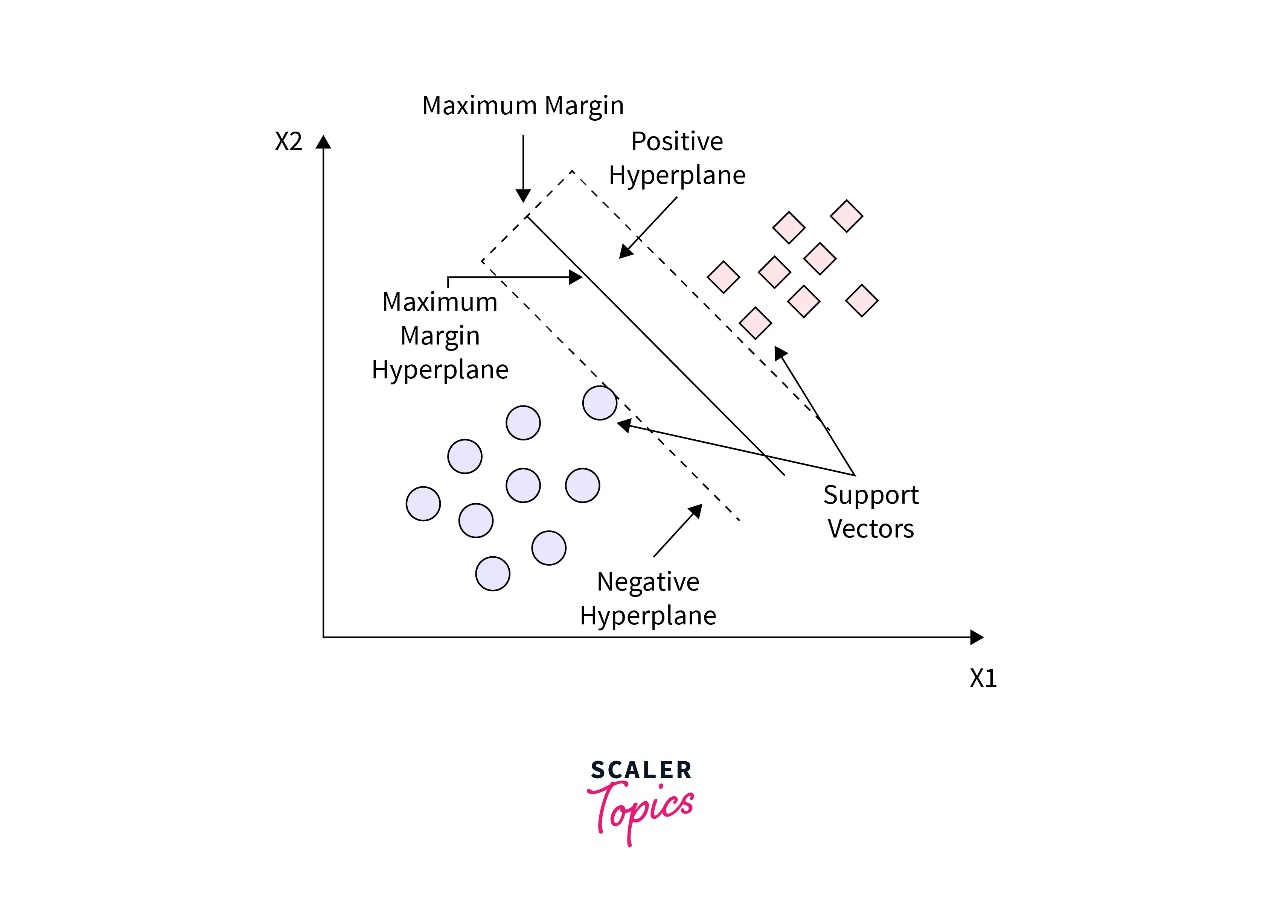

## SVM algorithm is of two types:-

### __Linear SVM:__ 
When the data points are linearly separable into two classes, the data is called linearly-separable data. We use the linear SVM classifier to classify such data.
### __Non-linear SVM:__
When the data is not linearly separable, we use the non-linear SVM classifier to separate the data points.

## If we cannot separate the data points with a single line we use non linear type.  
## Also, if we give more than two classes, it is impossible to separate them with a single straight line.
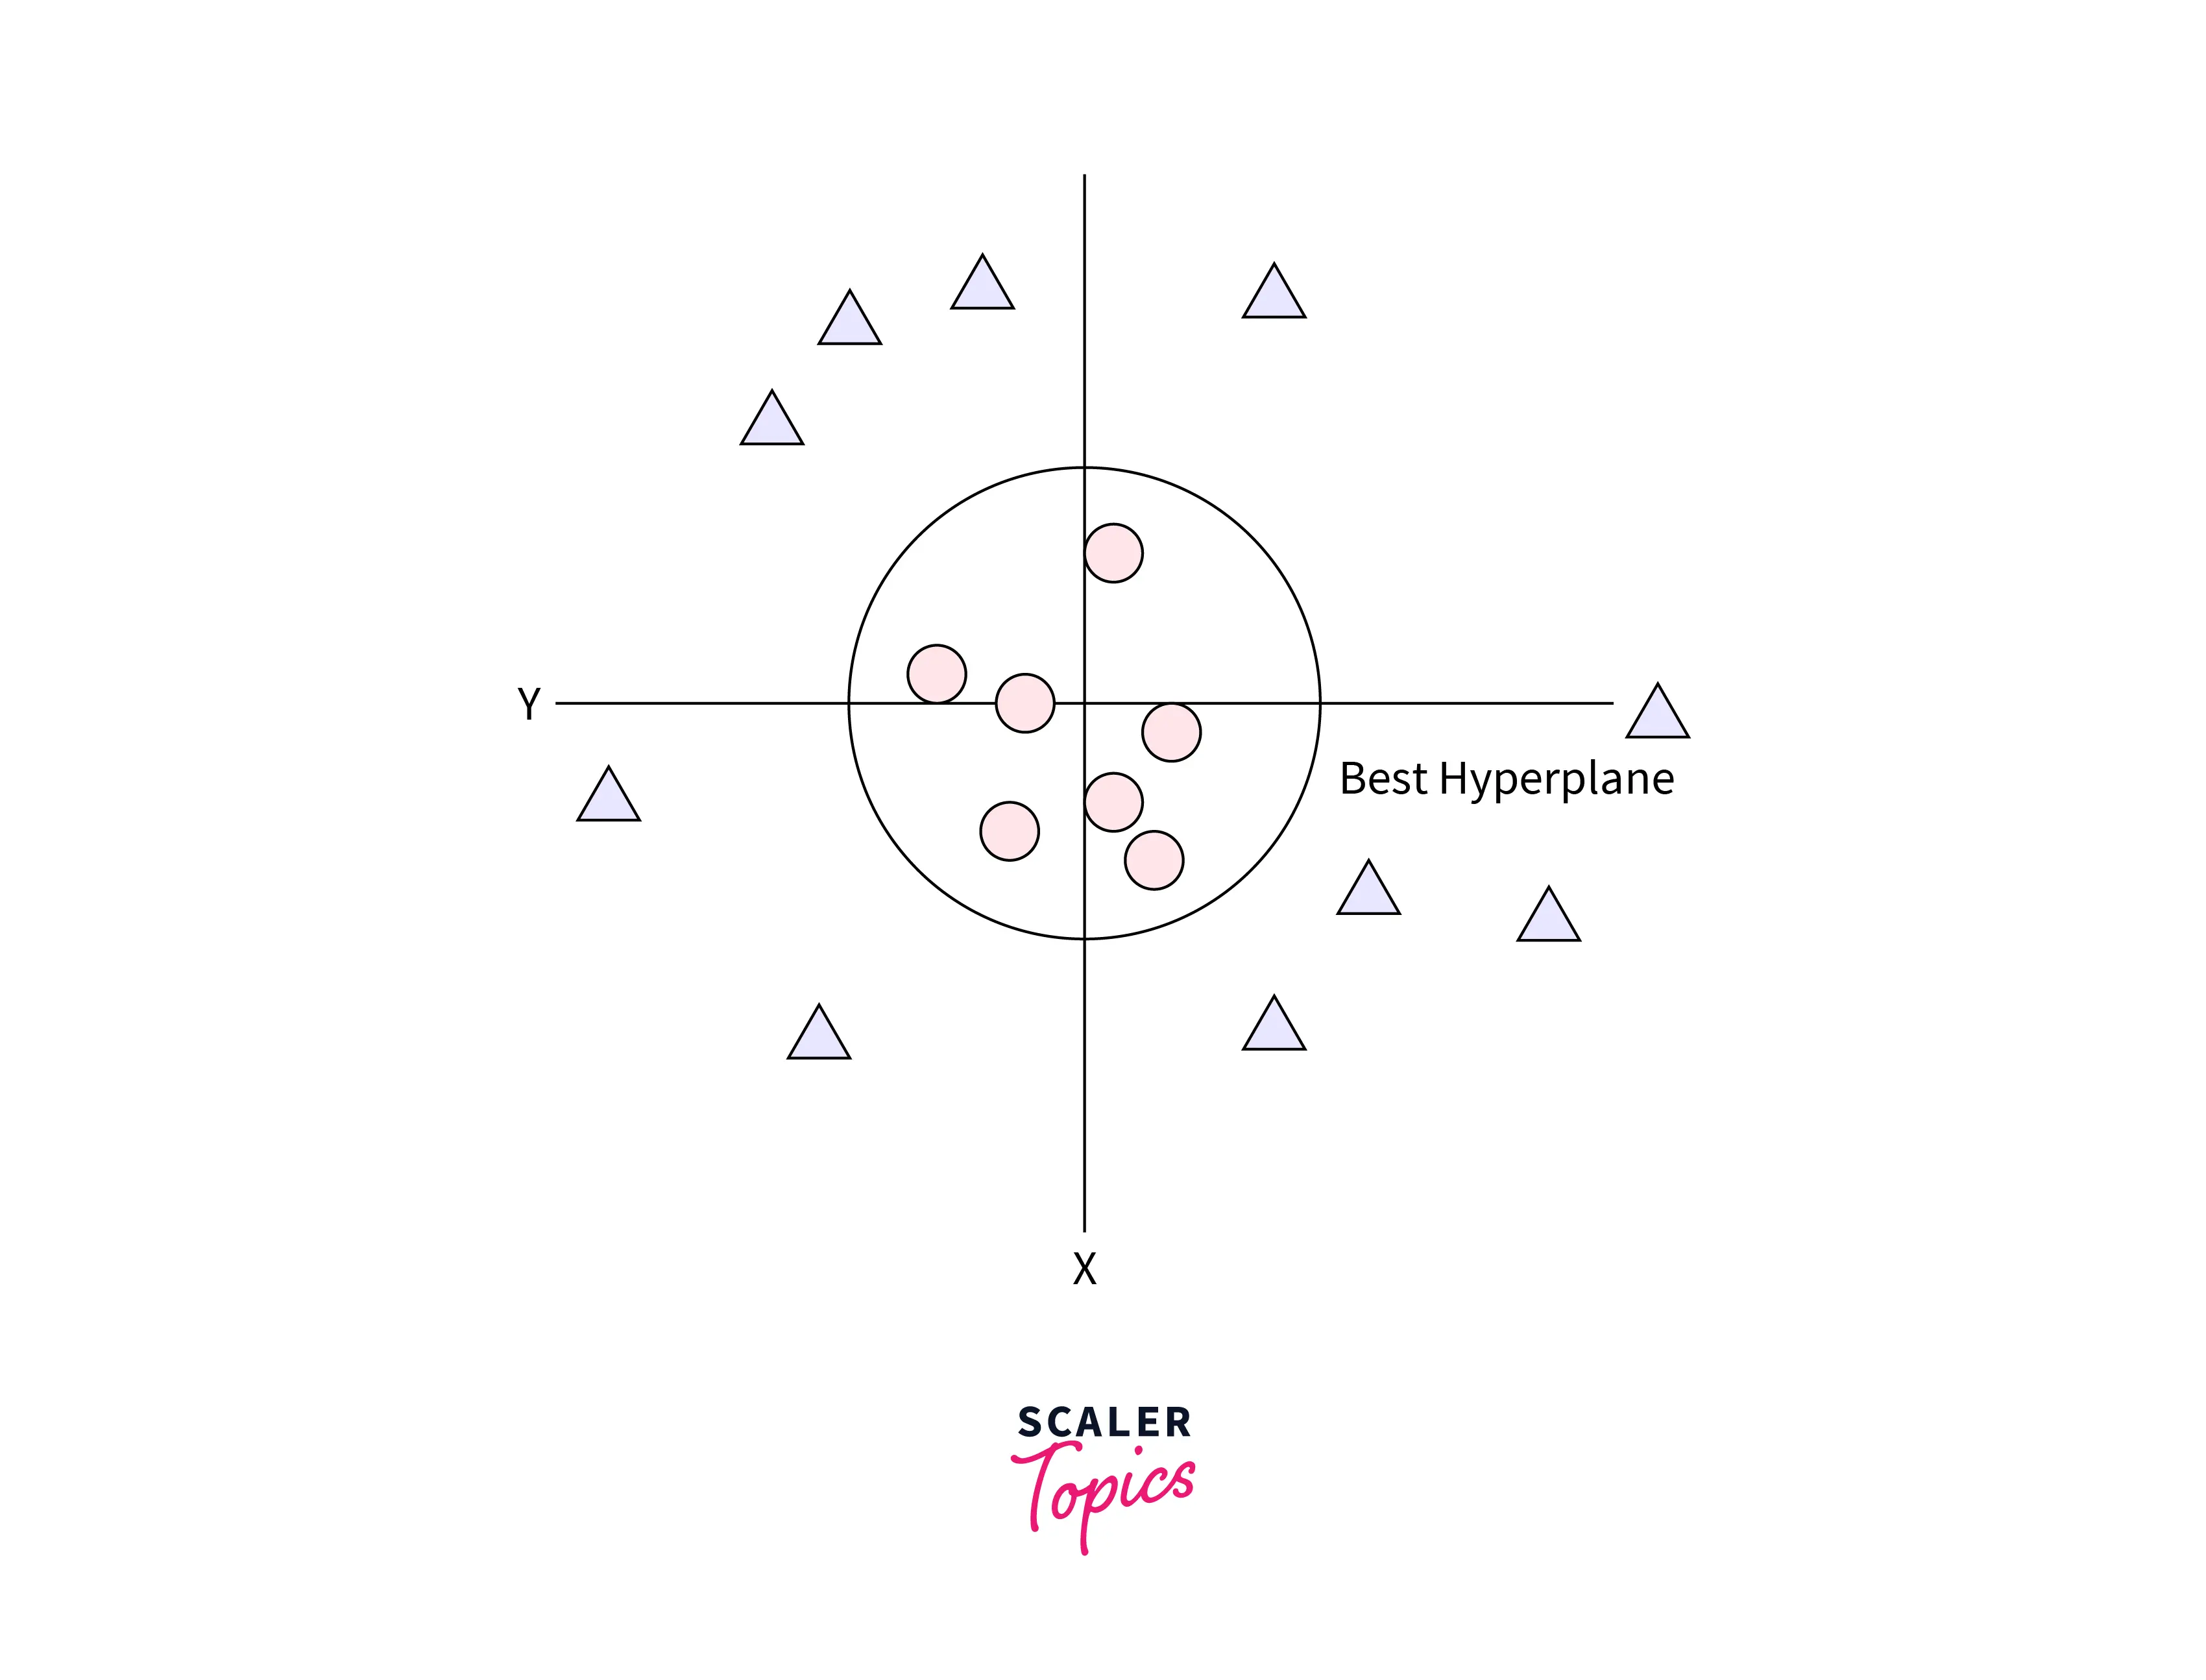

# SVM (Correlation Method data)

### Kernels in SVM
* The kernel is a mathematical function that converts a low-dimensional input space into a higher-dimensional space.__
* This is done by mapping the data into a new feature space.
* In this space, the data will be linearly separable.
* This means that a support vector machine can be used to find a hyperplane that separates the data.
![SVM Kernel](https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEidwnlkQ36EMMfIwJl_cRpfwmQDYIQ2MzAxAU5qfSld_UzE6-zGVN7pRO8X_d3SrjW9IrzZIJwjcsC57C1y7KezJzADzPptxvgVJFXTYnnRi5ZzK2SWQrPbnk-UH4XEZVo8V80JW4gYV9RMAHfvK8AWfl5KtLutQxYKg3R9-MlvG_hqXVJJYmXWGqusNw/s563/svm_kernels%20intro%20(1).png)



### The RBF Kernel

* __RBF, short for Radial Basis Function Kernel, is a very powerful kernel used in SVM.__
* Unlike linear or polynomial kernels, RBF is more complex and efficient simultaneously. It can combine multiple polynomial kernels multiple times, each with different degrees, to project the non-linearly separable data into a higher-dimensional space, enabling separation using a hyperplane.
* The RBF kernel operates by mapping the data into a high-dimensional space through the computation of dot products and squares of all the features in the dataset. Subsequently, classification is performed using the basic concept of Linear SVM.
![SVM Kernel](https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEjKERohMZ2lyYlDm0mlDdoFVcdhQkrENxECSYK6OKw_X-Bo_NBjRewhJTpTQ8DOl5JIkpRCbCNv5fhpJB0dxAoxtKMHi35YzMt0AccDWjmJeW1SbXTQ3HaLV447ooPkZpHLYcgbDdPBXW_dhmvz2f_lvrJYAqaZ7ba068kLcZCMDILsryoJf20FKZxfsA/s747/RBF%20Graph.png)

`The RBF kernel works by mapping the data into a high-dimensional space by finding the dot products and squares of all the features in the dataset and then performing the classification using the basic idea of Linear SVM.`
* __For projecting the data into a higher dimensional space, the RBF kernel uses the so-called radial basis function which can be written as:__
<center>\[ k(x_1, x_2) = \exp\left(-\frac{||x_1 - x_2||^2}{2\sigma^2}\right) \]
</center>
<center>
Here \( ||X_1 - X_2||^2 \) is known as the Squared Euclidean Distance and \( \sigma \) is a free parameter that can be used to tune the equation.
</center>
<center>
When introducing a new parameter \( \gamma = \frac{1}{2\sigma^2} \), the equation will be:
</center>
<center>
\[ k(X_1, X_2) = \exp(-\gamma ||X_1 - X_2||^2) \]
</center>

In [59]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_corr, y, test_size=0.2, random_state=42)

In [60]:
# Large Value of parameter C => small margin
# Small Value of paramerter C => Large margin
start = 1
end = 300
step = 20
c_values = np.arange(start, end , step)
accuracy = []
for C in c_values:
    # kernel is rbf
    svm_classifier = SVC(kernel='rbf',C=C)
    svm_classifier.fit(X_train, y_train)
    accuracy.append(svm_classifier.score(X_test, y_test))

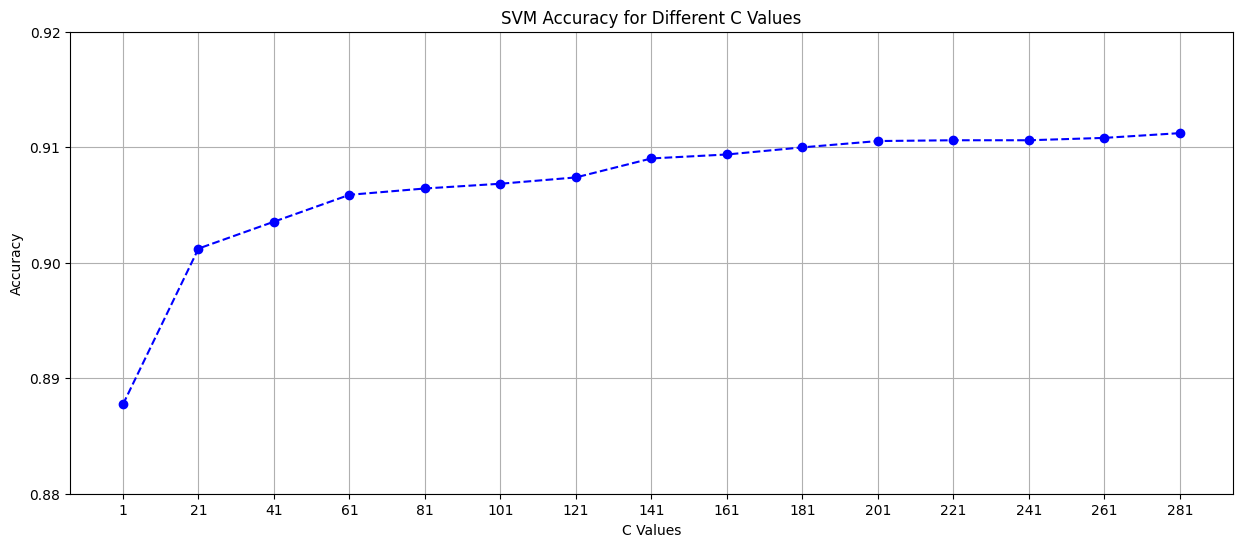

In [61]:
# Visualize the accuracy for different C values
plt.figure(figsize=(15, 6))
plt.plot(c_values, accuracy, marker='o', linestyle='dashed', color='b')
plt.title('SVM Accuracy for Different C Values')
plt.xlabel('C Values')
plt.ylabel('Accuracy')
plt.xticks(c_values)
# Define the range of y-axis ticks
start = 0.88
end = 0.92
step = 0.01
yticks = np.arange(start, end , step)
plt.yticks(yticks)
plt.grid(True)
plt.show()

In [62]:
# Different gamma values to visualize
gamma_values = np.linspace(0.2, 2 , 15)
accuracy = []
for gamma in gamma_values:
    svm_classifier = SVC(kernel='rbf',gamma=gamma)
    svm_classifier.fit(X_train, y_train)
    accuracy.append(svm_classifier.score(X_test, y_test))

### Gamma gets too big, influence too much, the decision boundary get too wiggled

![Image](https://miro.medium.com/v2/resize:fit:828/format:webp/1*r9CO-gp1uuRsYooCLL9UeQ.png)

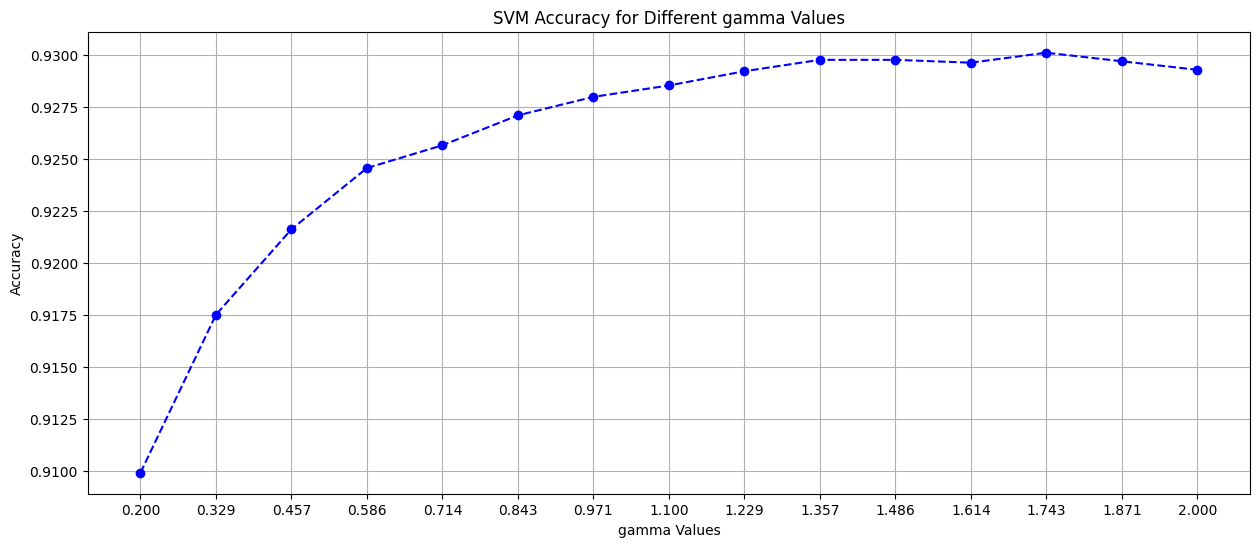

In [63]:
# Visualize the accuracy for different gamma values
plt.figure(figsize=(15, 6))
plt.plot(gamma_values, accuracy, marker='o', linestyle='dashed', color='b')
plt.title('SVM Accuracy for Different gamma Values')
plt.xlabel('gamma Values')
plt.ylabel('Accuracy')
plt.xticks(gamma_values)
plt.grid(True)
plt.show()

In [64]:
# Initialize and train the SVM classifier with specified parameters
svm_1 = SVC(kernel='rbf' , gamma=1.871, C=261)
svm_1.fit(X_train, y_train)

# Calculate accuracy on training set
train_accuracy = svm_1.score(X_train, y_train)

# Calculate accuracy on test set
test_accuracy = svm_1.score(X_test, y_test)

print("Support Vector Machine (SVM) - Training Accuracy:", train_accuracy)
print("Support Vector Machine (SVM) - Test Accuracy:", test_accuracy)

Support Vector Machine (SVM) - Training Accuracy: 0.9941300292642856
Support Vector Machine (SVM) - Test Accuracy: 0.9294955164624547


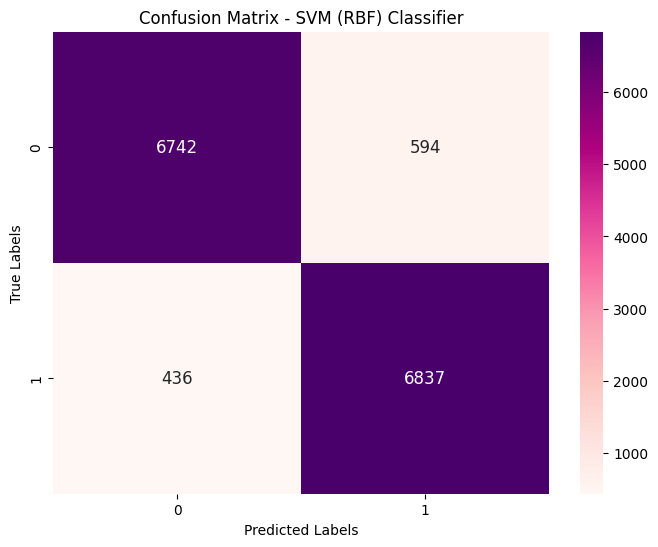

In [65]:
# Make predictions on the test set
svm_pred = svm_1.predict(X_test)

# Generate confusion matrix
svm_cm = confusion_matrix(y_test, svm_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='RdPu', annot_kws={"size": 12})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - SVM (RBF) Classifier')
plt.show()

In [66]:
# Generate classification report
poly_classification_report = classification_report(y_test, svm_pred)

# Display the classification report
print("Classification Report - SVM (poly) Classifier:")
print(poly_classification_report)

Classification Report - SVM (poly) Classifier:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      7336
           1       0.92      0.94      0.93      7273

    accuracy                           0.93     14609
   macro avg       0.93      0.93      0.93     14609
weighted avg       0.93      0.93      0.93     14609



## Wrapper Methods 

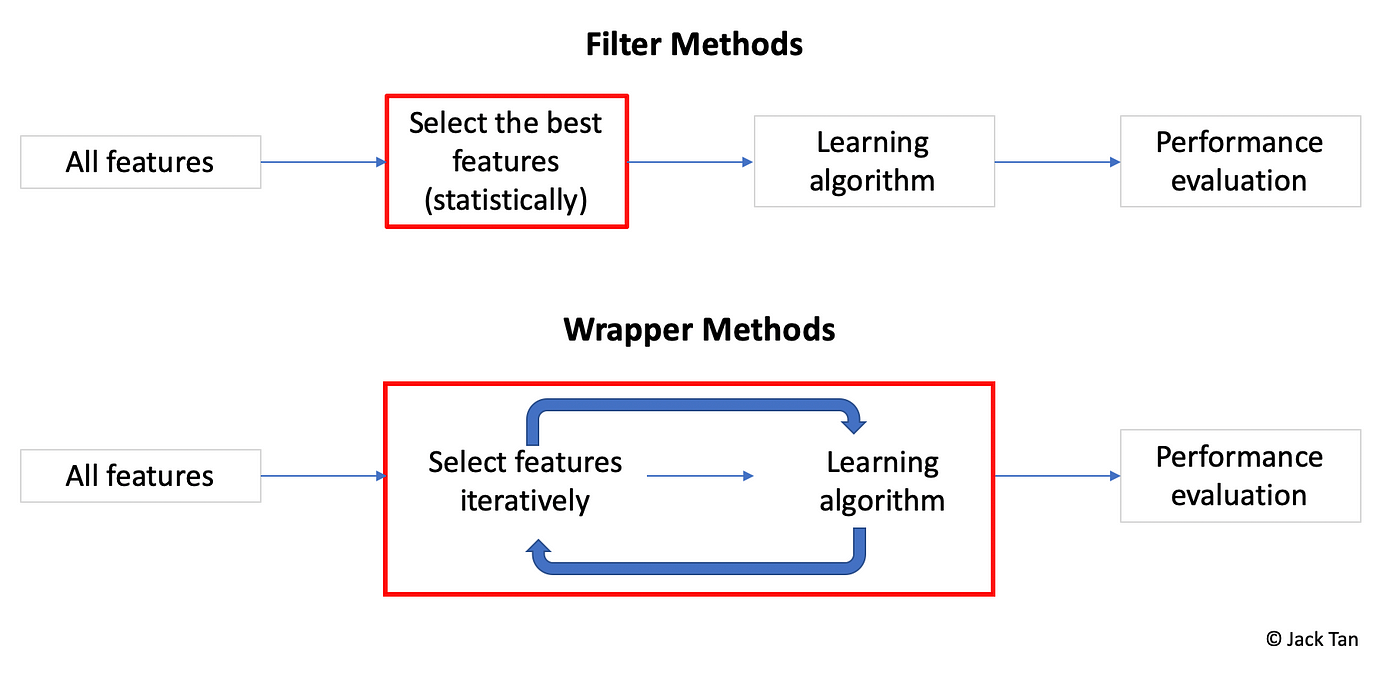

The whole idea builds upon greedy search and evaluation criterion. Greedy because the method at each iteration chooses the locally optimal subset of features. Then, the evaluation criterion plays the role of the judge. It is actually the performance metric we are using while training our model. The latter measures the importance of a subset of features by actually training a model on it.

### 1.	Forward Selection
*	Starting from Scratch: Begin with an empty set of features and iteratively add one feature at a time.
*	Model Evaluation: At each step, train and evaluate the machine learning model using the selected features.
*	Stopping Criterion: Continue until a predefined stopping criterion is met, such as a maximum number of features or a significant drop in performance


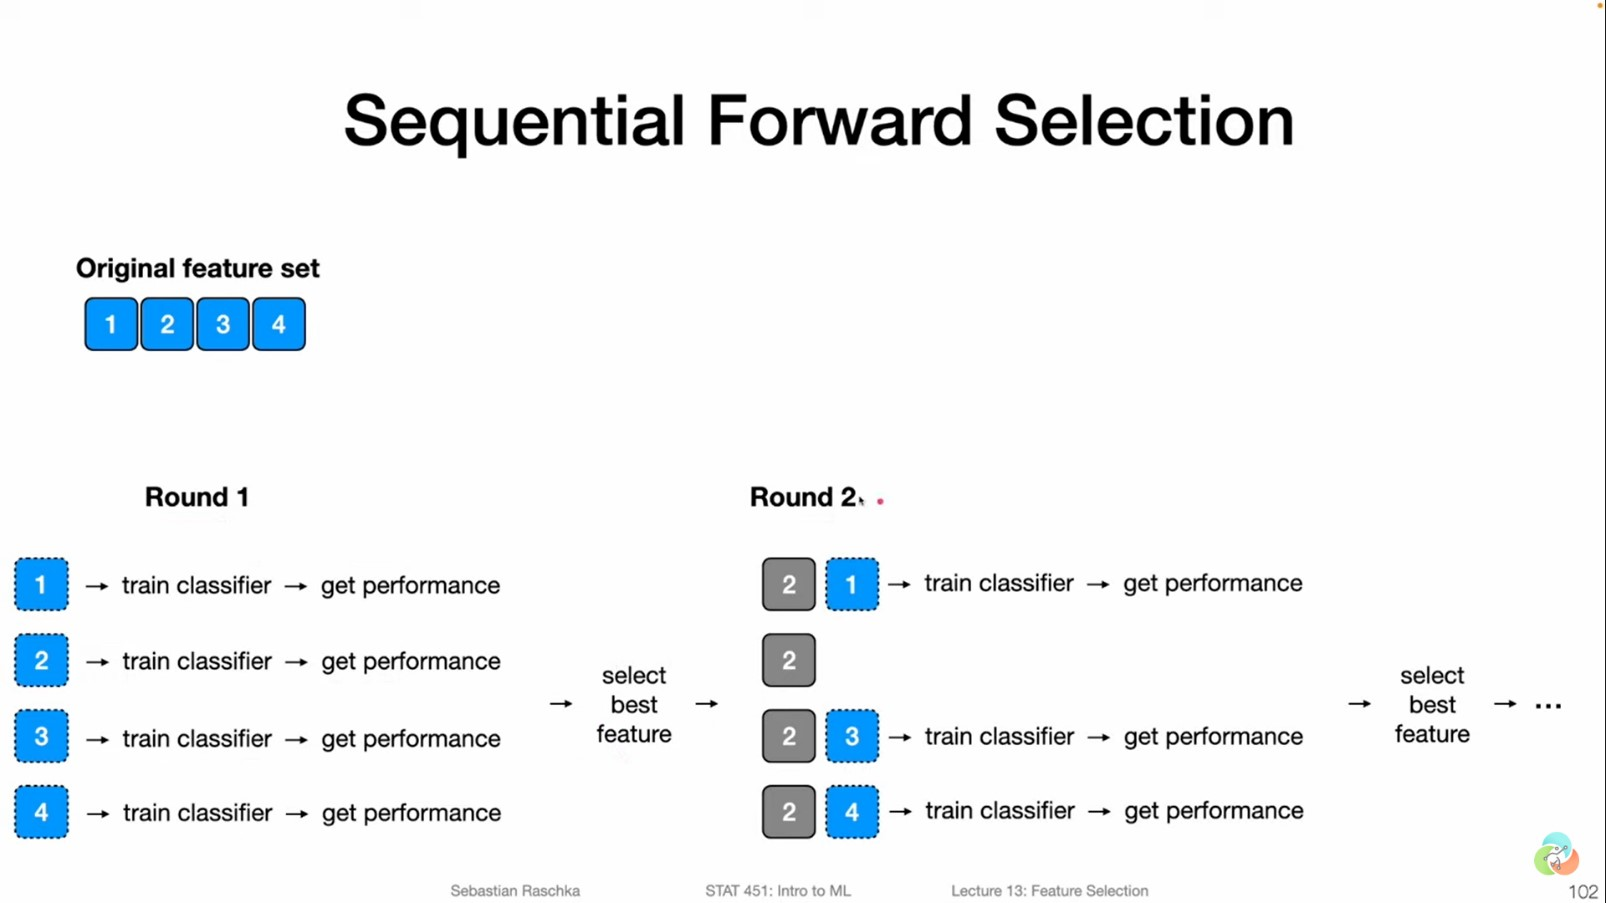

In [ ]:
# Wrapper feature selection (Forward Selection)
# Replace this with your dataset and labels
X = datanew.iloc[:10000, 0:-1].values
y = datanew.iloc[:10000, -1].values

# Initialize an empty list to store selected feature indices
selected_features = []

# Initialize SVM classifier
svm_model = SVC(kernel='linear')

# Get the feature names
feature_names = datanew.columns[0:-1].values


# Define the number of features you want to select
num_features_to_select = 10


while len(selected_features) < num_features_to_select:


    best_score = float('inf')  # Initialize with infinity for MSE
    best_feature = None

    for feature_idx in range(X.shape[1]):
        if feature_idx in selected_features:
            continue

        # Try adding the feature to the selected set
        candidate_features = selected_features + [feature_idx]

        # Evaluate the model's performance using cross-validation
        predicted_values = cross_val_predict(svm_model, X[:, candidate_features], y, cv=5)
        mse = mean_squared_error(y, predicted_values)

        # Keep track of the best-performing feature
        if mse < best_score:
            best_score = mse
            best_feature = feature_idx

    if best_feature is not None:
        selected_features.append(best_feature)
        print(f"Selected Feature {len(selected_features)}: {feature_names[best_feature]}, MSE: {best_score:.4f}")

print("Selected feature:", feature_names[selected_features])

Selected Feature 1: duration, MSE: 0.2729
Selected Feature 2: euribor3m, MSE: 0.1460
Selected Feature 3: emp.var.rate, MSE: 0.1426
Selected Feature 4: pdays, MSE: 0.1381
Selected Feature 5: nr.employed, MSE: 0.1353
Selected Feature 6: month, MSE: 0.1277
Selected Feature 7: contact, MSE: 0.1247
Selected Feature 8: education, MSE: 0.1236
Selected Feature 9: previous, MSE: 0.1231


## SVM (Forward selection)

### The Polynomial Kernel
* A polynomial kernel is a kind of SVM kernel that uses a polynomial function to map the data into a higher-dimensional space.
* It does this by taking the dot product of the data points in the original space and the polynomial function in the new space.
* In a polynomial kernel for SVM, the data is mapped into a higher-dimensional space using a polynomial function.
* The polynomial kernel has a number of parameters that can be tuned to improve its performance, including the degree of the polynomial and the coefficient of the polynomial.

<div style="overflow-x: auto; white-space: nowrap;">
\[ k(\mathbf{x}_1, \mathbf{x}_2) = (\mathbf{x}_1^T \mathbf{x}_2 + c)^d \]
</div>

* __The degree d of the polynomial can be used to control the complexity of the model.__ A high degree d will result in a more complex model that may overfit the data, while a low degree d will result in a simpler model that may underfit the data.
* __The parameter c can be used to control the trade-off between the fit of the training data and the size of the margin.__
When a dataset is given containing features \(x_1\) and \(x_2\), the equation can be transformed as:
<div style="overflow-y: hidden; white-space: nowrap; max-width: 100%;">
\[
\begin{pmatrix}
x_1 \\
x_2 \\
\end{pmatrix} \cdot \begin{pmatrix}
x_1 & x_2 \\
\end{pmatrix} = \begin{pmatrix}
x_1^2 & x_1 x_2 \\
x_2 x_1 & x_2^2 \\
\end{pmatrix}
\]
</div>

In [ ]:
selected_feature_names = feature_names[selected_features]
# Convert selected features into a DataFrame
selected_df = pd.DataFrame(X[:, selected_features], columns=selected_feature_names)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(selected_df, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (8000, 10)
X_test shape: (2000, 10)
y_train shape: (8000,)
y_test shape: (2000,)


In [ ]:
# Define the parameter distributions for randomized search
param_dist = {
    'C': uniform(0.1, 10.0),  # Range of C values
    'kernel': ['poly'],  # Use only 'poly' kernel
    'gamma': uniform(0.1, 2.0) ,  # 'scale' and 'auto' for gamma
    'coef0': uniform(-1.0, 1.0)  # Range of coef0 values
}

# Create an SVM classifier
svm_classifier = SVC(random_state=42)

# Randomized search with cross-validation
random_search = RandomizedSearchCV(svm_classifier, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)
random_search.fit(X_train, y_train)

# Extract best parameters from randomized search
best_params = random_search.best_params_

# Extract C, kernel, gamma, and coef0 values used in the search
C_values = random_search.cv_results_['param_C'].data
kernel_values = random_search.cv_results_['param_kernel'].data
gamma_values = random_search.cv_results_['param_gamma'].data
coef0_values = random_search.cv_results_['param_coef0'].data

# Create a DataFrame for scatter plot data
results_df = pd.DataFrame({
    'C': C_values,
    'Kernel': kernel_values,
    'Gamma': gamma_values,
    'Coef0': coef0_values,
    'Mean Test Score': random_search.cv_results_['mean_test_score']
})

In [ ]:
# Create a 3D scatter plot
fig = px.scatter_3d(results_df, x='Coef0', y='C', z='Gamma', color='Mean Test Score', opacity=0.8, size_max=12)

# Update layout
fig.update_layout(
    scene=dict(
        xaxis_title='Coef0',
        yaxis_title='C',
        zaxis_title='Gamma',
    ),
    title='Relationship between Gamma, Coef0, C, and Mean Test Score (Kernel: Poly)',
    width=800,
    height=600
)
# Show the plot
iplot(fig)
# Best parameters from the randomized search
print("Best Parameters:", best_params)

Best Parameters: {'C': 3.845401188473625, 'coef0': -0.049285693590083834, 'gamma': 1.5639878836228103, 'kernel': 'poly'}


In [ ]:
# Initialize and train the SVM classifier with specified parameters
svm_poly = SVC(**best_params)
svm_poly.fit(X_train, y_train)

# Calculate accuracy on training set
train_accuracy = svm_poly.score(X_train, y_train)

# Calculate accuracy on test set
test_accuracy = svm_poly.score(X_test, y_test)

print("Support Vector Machine (SVM) - Training Accuracy:", train_accuracy)
print("Support Vector Machine (SVM) - Test Accuracy:", test_accuracy)

Support Vector Machine (SVM) - Training Accuracy: 0.803625
Support Vector Machine (SVM) - Test Accuracy: 0.805


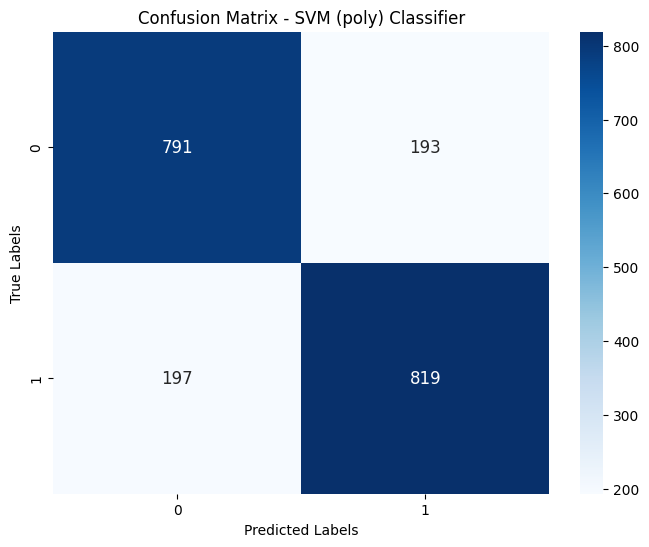

In [ ]:
# Make predictions on the test set
svm_pred = svm_poly.predict(X_test)

# Generate confusion matrix
svm_cm = confusion_matrix(y_test, svm_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 12})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - SVM (poly) Classifier')
plt.show()

In [ ]:
# Generate classification report
poly_classification_report = classification_report(y_test, svm_pred)

# Display the classification report
print("Classification Report - SVM (poly) Classifier:")
print(poly_classification_report)

Classification Report - SVM (poly) Classifier:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       984
           1       0.81      0.81      0.81      1016

    accuracy                           0.81      2000
   macro avg       0.80      0.80      0.80      2000
weighted avg       0.81      0.81      0.81      2000



### 2.	Backward Elimination
*	Starting with Everything: Start with all available features.
*	Iterative Removal: In each iteration, remove the least important feature and evaluate the model.
*	Stopping Criterion: Continue until a stopping condition is met.

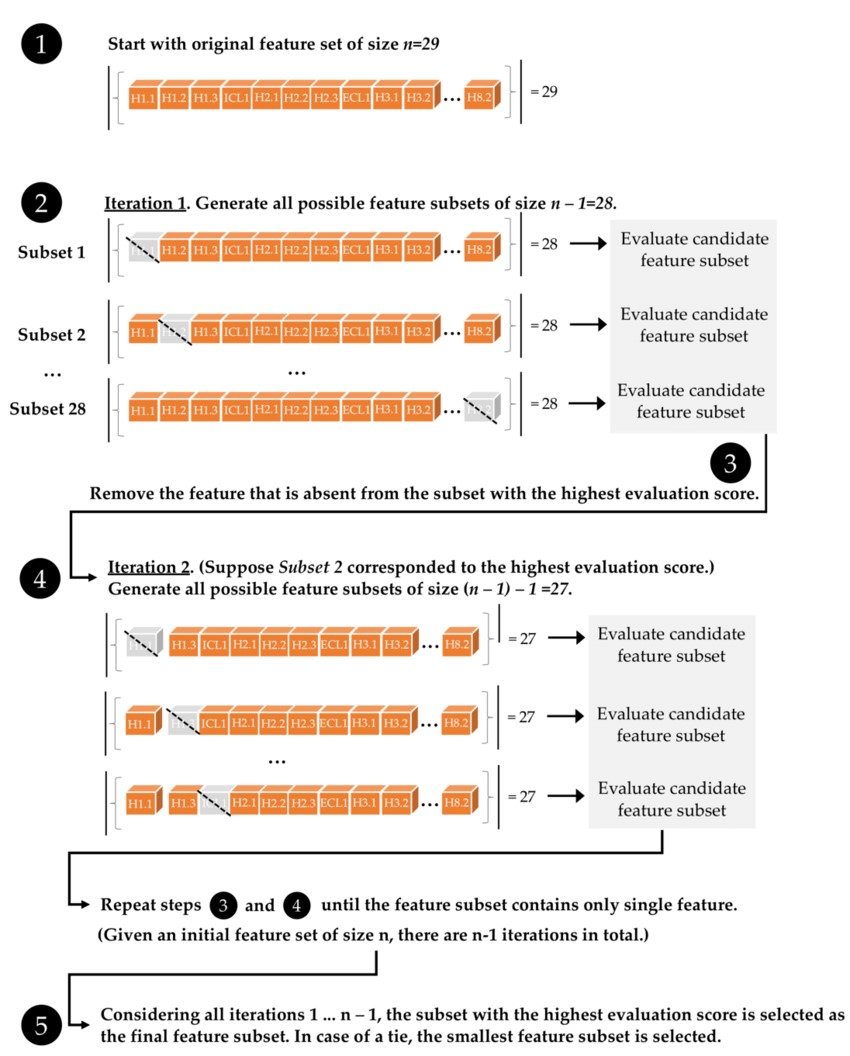

In [ ]:
# Wrapper feature selection (Backward Selection)
# Replace this with your dataset and labels
X = datanew.iloc[:100, 0:-1].values
y = datanew.iloc[:100, -1].values

# Initialize an empty list to store selected feature indices
all_features = list(range(X.shape[1]))

# Initialize SVM classifier
svm_model = SVC(kernel='linear')

# Get the feature names
feature_names = datanew.columns[0:-1].values


# Define the number of features you want to select
min_features_to_retain = 10


while len(all_features) > min_features_to_retain:
    worst_score = float('-inf')  # Initialize with infinity for MSE
    worst_feature = None


    for feature_idx in all_features:
        
        # Create a list of features without the current one
        candidate_features = [f for f in all_features if f != feature_idx]

        # Evaluate the model's performance using cross-validation
        predicted_values = cross_val_predict(svm_model, X[:, candidate_features], y, cv=5)
        mse = mean_squared_error(y, predicted_values)

        # Keep track of the worst-performing feature
        if mse > worst_score:
            worst_score = mse
            worst_feature = feature_idx

    if worst_feature is not None:
        all_features.remove(worst_feature)
        print(f"Removed Feature: {feature_names[worst_feature]}, MSE: {worst_score:.4f}")

print("Remaining feature:", feature_names[all_features])

Removed Feature: duration, MSE: 0.2700
Removed Feature: contact, MSE: 0.3100
Removed Feature: emp.var.rate, MSE: 0.3400
Removed Feature: month, MSE: 0.3500
Removed Feature: cons.conf.idx, MSE: 0.3600
Removed Feature: job, MSE: 0.3700
Removed Feature: age, MSE: 0.3700
Removed Feature: campaign, MSE: 0.3700
Removed Feature: education, MSE: 0.3600
Remaining feature: ['marital' 'housing' 'loan' 'day_of_week' 'pdays' 'previous' 'poutcome'
 'cons.price.idx' 'euribor3m' 'nr.employed']


In [ ]:
# Apply feature selection to X
X_selected = X[:, all_features]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [ ]:
# Define the parameter distributions for randomized search
param_dist = {
    'C': uniform(0.1, 10.0),  # Range of C values
    'kernel': ['poly'],  # Use only 'poly' kernel
    'gamma': uniform(0.1, 2.0) ,  # 'scale' and 'auto' for gamma
    'coef0': uniform(-1.0, 1.0)  # Range of coef0 values
}

# Create an SVM classifier
svm_back = SVC(random_state=42)

# Randomized search with cross-validation
random_search = RandomizedSearchCV(svm_back, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)
random_search.fit(X_train, y_train)

# Extract best parameters from randomized search
best_params = random_search.best_params_

# Extract C, kernel, gamma, and coef0 values used in the search
C_values = random_search.cv_results_['param_C'].data
kernel_values = random_search.cv_results_['param_kernel'].data
gamma_values = random_search.cv_results_['param_gamma'].data
coef0_values = random_search.cv_results_['param_coef0'].data

# Create a DataFrame for scatter plot data
results_df = pd.DataFrame({
    'C': C_values,
    'Kernel': kernel_values,
    'Gamma': gamma_values,
    'Coef0': coef0_values,
    'Mean Test Score': random_search.cv_results_['mean_test_score']
})
# Best parameters from the randomized search
print("Best Parameters:", best_params)

Best Parameters: {'C': 7.180725777960454, 'coef0': -0.9794155057041976, 'gamma': 2.0398197043239885, 'kernel': 'poly'}


In [ ]:
# Initialize and train the SVM classifier with specified parameters
svm_poly2 = SVC(**best_params)
svm_poly2.fit(X_train, y_train)

# Calculate accuracy on training set
train_accuracy = svm_poly2.score(X_train, y_train)

# Calculate accuracy on test set
test_accuracy = svm_poly2.score(X_test, y_test)

print("Support Vector Machine (SVM) - Training Accuracy:", train_accuracy)
print("Support Vector Machine (SVM) - Test Accuracy:", test_accuracy)

Support Vector Machine (SVM) - Training Accuracy: 0.975
Support Vector Machine (SVM) - Test Accuracy: 0.7


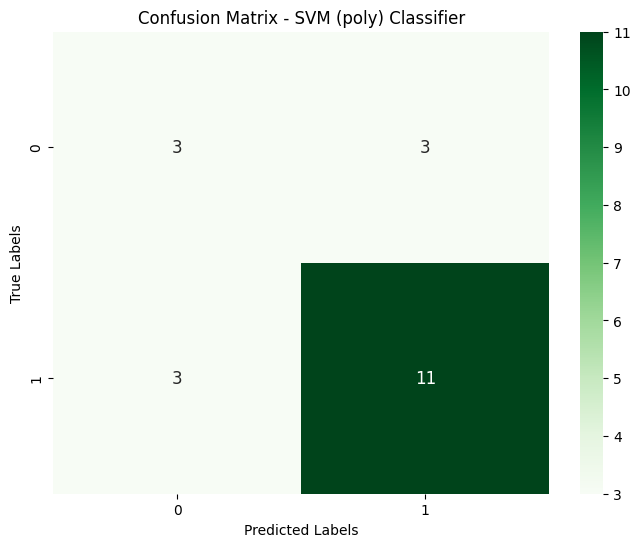

In [ ]:
# Make predictions on the test set
svm_pred = svm_poly2.predict(X_test)

# Generate confusion matrix
svm_cm = confusion_matrix(y_test, svm_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(svm_cm, annot=True, fmt='d',cmap='Greens' , annot_kws={"size": 12})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - SVM (poly) Classifier')
plt.show()

In [ ]:
# Generate classification report
poly_classification_report = classification_report(y_test, svm_pred)

# Display the classification report
print("Classification Report - SVM (poly) Classifier:")
print(poly_classification_report)

Classification Report - SVM (poly) Classifier:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         6
           1       0.79      0.79      0.79        14

    accuracy                           0.70        20
   macro avg       0.64      0.64      0.64        20
weighted avg       0.70      0.70      0.70        20



<a id="import"></a>
# <p style="background-color:tomato; font-family:calibri; font-size:130%; color:white; text-align:center; border-radius:40px 40px; padding:15px">Linear Discriminant Analysis (LDA)</p>

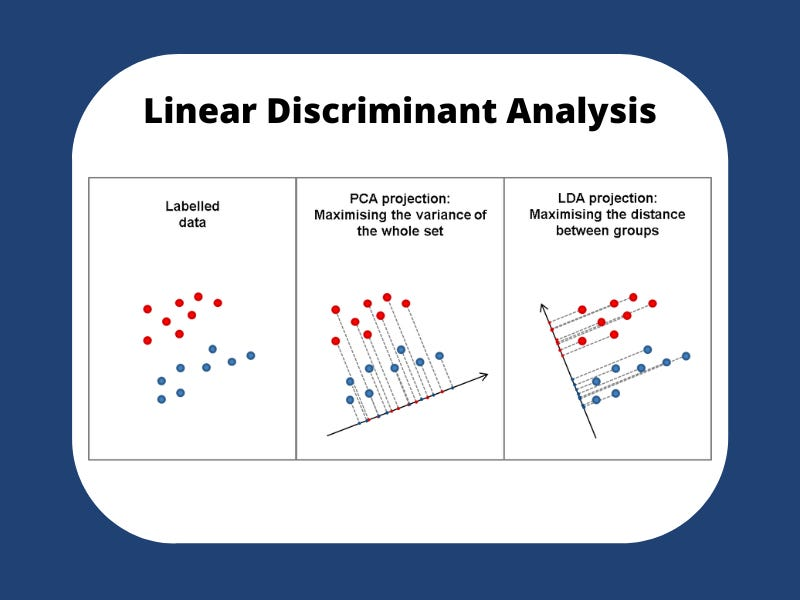

**Linear Discriminant Analysis (LDA)** is a supervised learning algorithm used to classify a data set into multiple classes. It is a linear transformation technique which seeks to find a set of linear combinations of variables that best separate classes of data. LDA is a classification technique that looks at the data set and finds a linear combination of variables that will best separate the data.</span> It is often used to reduce the number of variables in a data set while still retaining the important information for classification. 

The basic idea behind LDA is to maximize the ratio of the between-class variance to the within-class variance. The goal of LDA is to find a linear combination of variables that separates the classes as much as possible. This is accomplished by finding the direction that maximizes the ratio of the between-class variance to the within-class variance.

- The first step in LDA is to calculate the means and the covariance matrix of the data set. The means are the average values of each variable across all the classes. The covariance matrix is a measure of the variance between the variables. 
- Once the means and the covariance matrix are calculated, a linear combination of the variables is calculated that maximizes the ratio of between-class variance to within
    
**Why LDA?**
- LDA is particularly useful when dealing with a high-dimensional dataset as it provides a way to reduce the number of dimensions while preserving as much of the variation in the original data as possible. 
- It also helps identify the most important variables in a dataset, which is useful for further analysis. LDA can be used for exploratory data analysis and for predictive modeling.
- LDA is also used in face detection algorithms. In Fisherfaces, LDA is used to extract useful data from different faces. Coupled with eigenfaces, it produces effective results.
    
**Drawbacks of Linear Discriminant Analysis (LDA)**

1. It assumes that the data is normally distributed, which may not always be the case in real-world data sets. 
2. It assumes that the variables are statistically independent, which is also not always the case in real-world data sets. 
3. It is sensitive to outliers, which can affect the accuracy of the model. 
4. It can only be used for two-class classification problems, and does not work well with multi-class problems. 
5. It is not suitable for data sets with a large number of features, as it can become computationally expensive.


**Difference between Linear Discriminant Analysis and Principal Component Analysis**

| Feature                                      | Linear Discriminant Analysis (LDA)                        | Principal Component Analysis (PCA)                       |
|----------------------------------------------|-----------------------------------------------------------|----------------------------------------------------------|
| **Nature**                                   | Supervised learning technique                               | Unsupervised dimensionality reduction technique          |
| **Objective**                                | Classify objects into categories based on predictor variables | Reduce dimensionality and retain most data variability    |
| **Applicability**                            | Commonly used in classification problems, especially for binary classification | Widely used for simplifying datasets with many variables  |
| **Linear Combination**                       | Finds the linear combination of features that best separates classes | Extracts uncorrelated components capturing data variability |
| **Classes Separation**                       | Maximizes the separation between classes                    | Maximizes variance along principal components              |
| **Data Requirement**                         | Requires labeled data for training                          | Works well with unlabeled data                             |
| **Complexity Reduction**                     | Focuses on separating classes, less emphasis on reducing complexity | Primarily used to reduce the complexity of a dataset       |
| **Ordered Components**                       | Components are ordered based on their contribution to class separation | Components are ordered by the amount of total variance they explain |
| **Use Case Example**                         | Face recognition, medical diagnosis                         | Image compression, feature extraction                      |

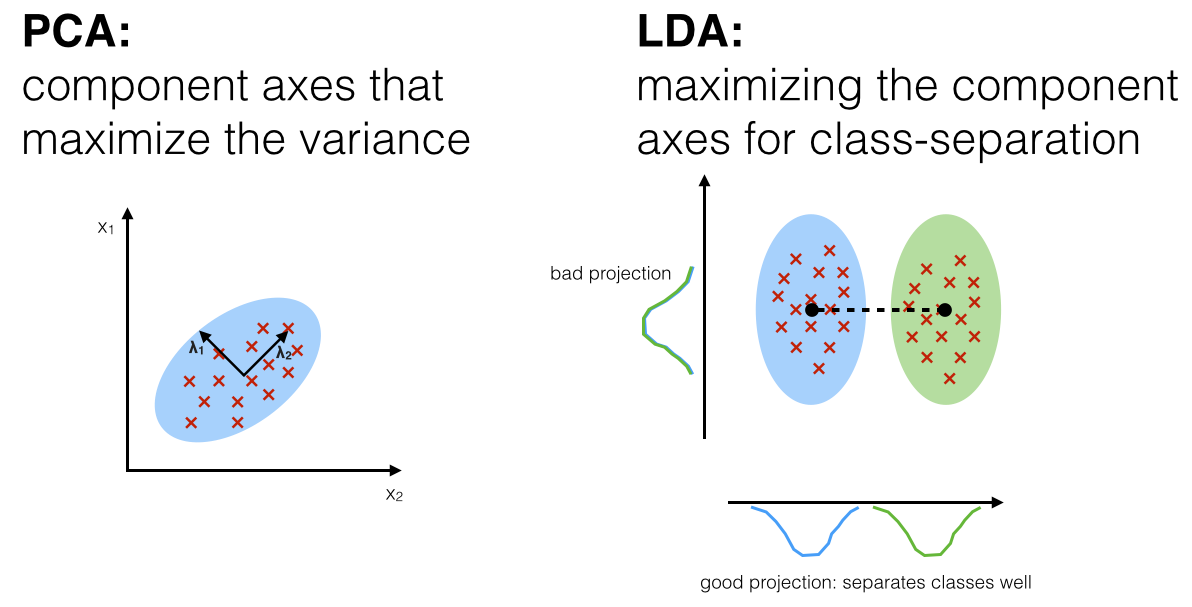

Let's see if we can use LDA for Dimensionality Reduction with this data

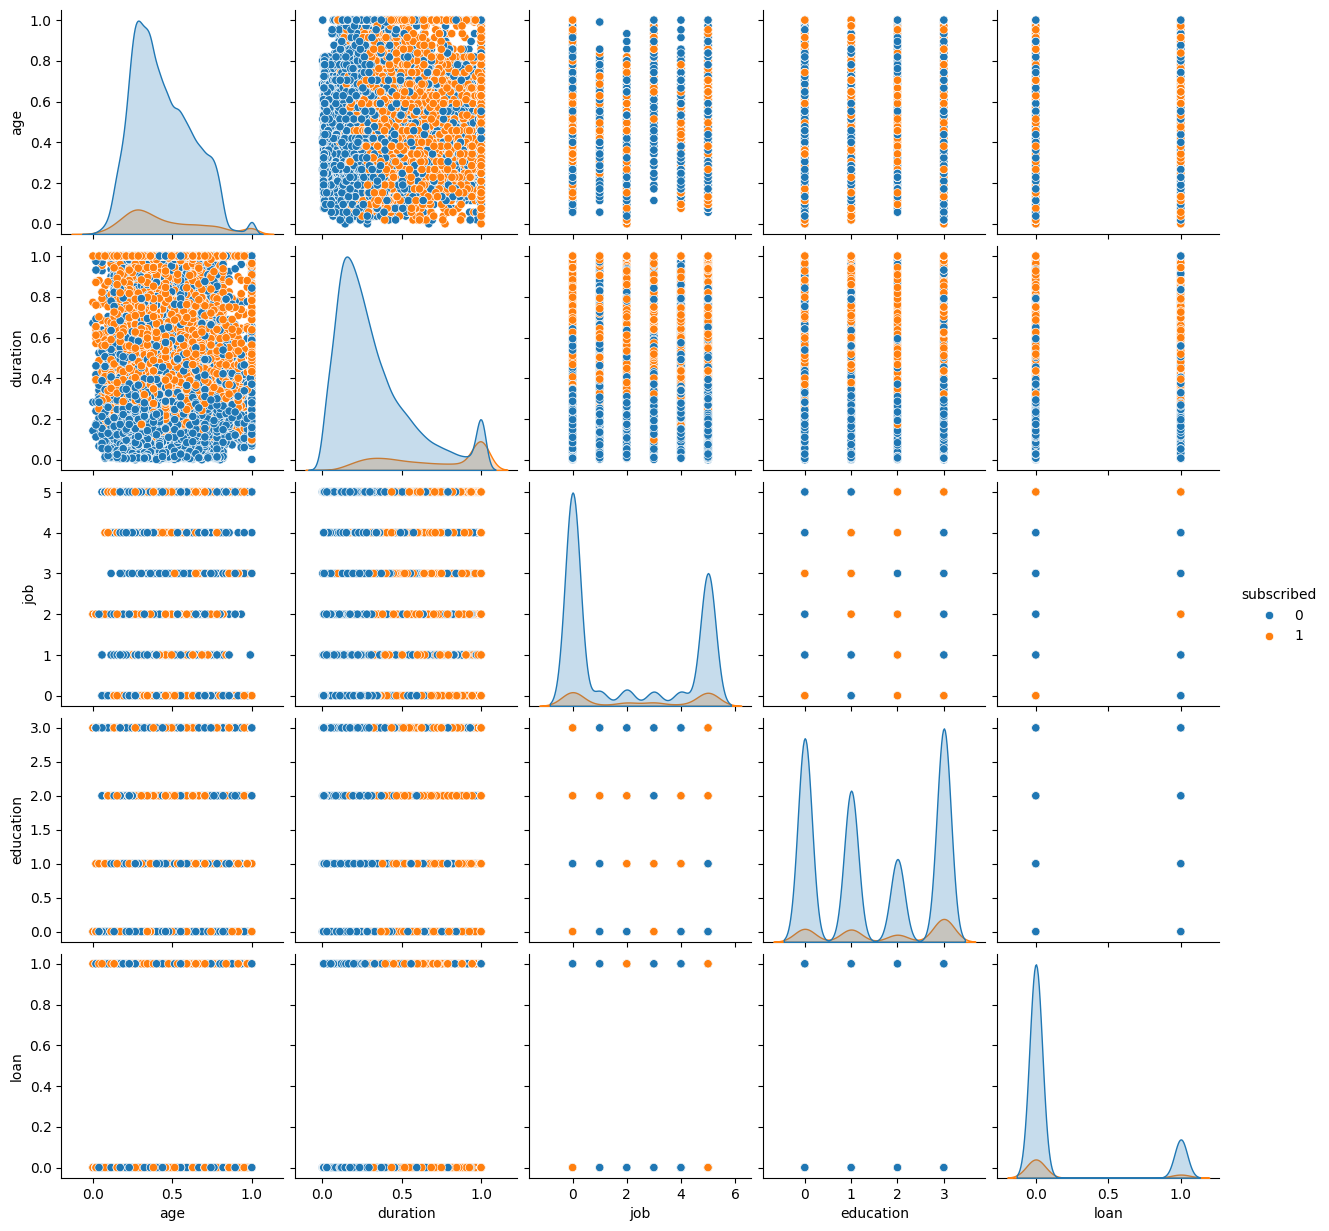

In [ ]:
sns.pairplot(data, hue = 'subscribed', vars = ['age', 'duration', 'job','education','loan'])

___Insights:___ As we see in the plots above that variables are not statistically independent and we can not separate the classes with  linear combinations, and we can not use LDA as Dimensionality Reduction Technique.

##  Results
1) **Marketing Activity Months:** We saw that the month with the highest marketing activity was **May**. However, this is the month when potential customers tend to reject time deposit offers (rejection rate: 33%). For the next marketing campaign, it would be wise for the bank to focus on the marketing campaign in **March, September, October and December**. (December should be taken into account as it is the month with the lowest marketing activity. There may be a reason why December is the lowest(110 customers).)<br><br>
2) **Age Category:** Bank's next marketing campaign should target potential customers `25 or younger and 60 or older`. Customers aged 25 and under have a `71%` chance of subscribing to time deposits, while those aged 60 and over have an `82%` chance of subscribing to time deposits. For the next campaign, it would be great if the bank could address these two categories, thereby increasing the possibility of demand for more time deposits. <br><br>
3) **Job:** Potential customers who are students or retired were most likely to apply for time deposits. Retired individuals tend to have more time deposits to earn some cash through interest payments. Term deposits are short-term loans in which the person (in this case the retired person) agrees not to withdraw cash from the bank until a certain date agreed between the person and the financial institution. After this period, the person gets his capital back and gets the interest he made on the loan. Retired individuals tend not to spend a great deal of their cash, so they are more likely to put their money to work by lending it to the financial institution. <br><br>
4)**Credit and Balance:** Potential customers in the low and zero balance category were more likely to get a home loan than customers in the medium and high balance category. What does it mean to get a home loan? This means that the potential customer has the financial privileges to repay the home loan and therefore has no cash to open in the time deposit account. However, we see that potential customers with average and high balances are less likely to use housing loans and therefore more likely to open time deposits. Finally, the next marketing campaign should focus on average and high-balance individuals to increase the likelihood of subscribing to time deposits. <br><br>
5) **Campaign Calls:** To save time and effort in acquiring new leads, a policy should be implemented stating that a maximum of 3 calls should be applied to the same potential customer. Remember, the more we call the same prospect, the more likely he will refuse to open a time deposit. <br><br>
6) **Customers with more than average call time (over 372) should be targeted:** The probability of opening a time deposit account for this group is quite high with 77%. It ensures that the success rate of the next marketing campaign is quite successful.<br><br>

<a id="import"></a>
# <p style="background-color:tomato; font-family:calibri; font-size:130%; color:white; text-align:center; border-radius:40px 40px; padding:15px">Principle Component analysis (PCA)</p>

Principal Component Analysis (PCA) is a dimensionality reduction technique that aims to simplify complex data while retaining essential information. It transforms a set of correlated variables into a smaller number of uncorrelated variables called principal components, effectively summarizing the data's key patterns.

PCA serves two primary purposes:

###### 1-Dimensionality Reduction: PCA reduces the number of variables, simplifying data visualization and analysis. This makes it easier to identify patterns and relationships within the data.

###### 2-Overfitting Prevention: By eliminating highly correlated features, PCA reduces the risk of overfitting in machine learning models. Overfitting occurs when a model becomes too closely aligned with the training data, leading to poor performance on new data.

PCA achieves these goals by maximizing the variance of the projected data on a given axis while minimizing the reconstruction error or residuals. It identifies principal components, directions that capture the most significant variations in the data. Projecting data onto these principal components maximizes variance and minimizes reconstruction error, effectively reducing dimensionality without losing crucial information.

The below image aptly illustrates PCA's objective. The red dots represent data points, and the arrows represent principal components. Longer arrows correspond to directions with higher variance, while shorter arrows correspond to directions with lower variance. PCA projects data onto these principal components, reducing dimensionality while preserving essential information.

<center>
<img src="https://alexhwilliams.info/itsneuronalblog/img/pca/pca_two_views.png", width=800>
</center>

In [ ]:
# Split Data¶
X = datanew.drop('subscribed',axis=1)
y = datanew[['subscribed']]

In [ ]:
# pca is sensitive to scale 
# the data must be on same range

sc= StandardScaler()
X_scaled=sc.fit_transform(X)

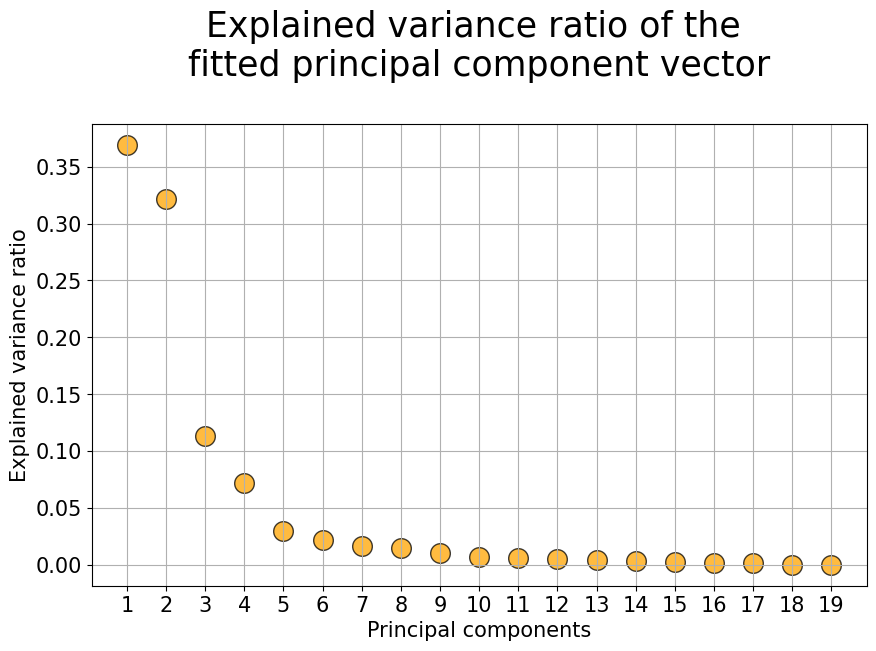

In [ ]:
pca = PCA(n_components=None)
dfx_pca = pca.fit(X)

#Plot the explained variance ratio

plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],
            y=dfx_pca.explained_variance_ratio_,
            s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

The above plot means that the 
 1st principal component explains about 55% of the total variance in the data and the 
 2nd component explians further 42%. Therefore, if we just consider first two components, they together explain 97% of the total variance.

In [ ]:
pca=PCA(n_components=10)
X_pca=pca.fit_transform(X_scaled)

In [ ]:
data_pca=pd.DataFrame(X_pca)
data_pca.head()

,0,1,2,3,4,5,6,7,8,9
0,0.924887,-1.583893,-1.526815,-1.539692,-1.220151,1.036659,-1.230569,0.891305,3.052664,-0.310549
1,1.397145,-0.963389,-0.165609,1.046401,-1.173061,1.061417,0.557228,0.189117,-0.841434,0.056254
2,2.358994,3.548988,-1.110084,-1.100710,-2.139676,-0.146201,1.077795,-0.677608,0.399075,-1.236533
3,-1.954825,0.842057,0.204782,0.176812,1.496501,0.170824,-1.331329,-0.127836,-1.123411,0.012400
4,-2.803143,0.191736,-1.001390,-1.685744,0.799987,0.049743,0.744239,-0.777169,0.403962,-0.006674


Support Vector Machine algorithm
Support Vector Machine aka Support Vector Network is a supervised machine learning algorithm used for classification and regression problems. The advantages of support vector machines are:

Effective in high dimensional spaces.

Still effective in cases where number of dimensions is greater than the number of samples.

Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.

Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(
    data_pca, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(58433, 10)

In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear',random_state=42)

# Train the SVM classifier on the training data
svm_classifier.fit(X_train, Y_train)

# Predict the labels of the test set
Y_pred = svm_classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8370867273598467


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='poly',C=100, random_state=42)

# Train the SVM classifier on the training data
svm_classifier.fit(X_train, Y_train)

# Predict the labels of the test set
Y_pred = svm_classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8667259908275721


In [ ]:
# Fit a LinearSVC model
linear_svc = LinearSVC(random_state=42)
linear_svc.fit(X_train, Y_train)

# Predict on the test set
y_pred_linear = linear_svc.predict(X_test)

# Calculate accuracy
accuracy_linear = accuracy_score(Y_test, y_pred_linear)

print("Accuracy of LinearSVC:", accuracy_linear)

# If LinearSVC performs poorly, try SVM with nonlinear kernels
if accuracy_linear < 0.9:  # Adjust this threshold as needed
    # Fit an SVM with polynomial kernel
    svm_poly = SVC(kernel='poly', degree=3, gamma='scale', random_state=42)
    svm_poly.fit(X_train, Y_train)
    y_pred_poly = svm_poly.predict(X_test)
    accuracy_poly = accuracy_score(Y_test, y_pred_poly)
    print("Accuracy of SVM with Polynomial Kernel:", accuracy_poly)

    # Fit an SVM with RBF kernel
    svm_rbf = SVC(kernel='rbf', gamma='scale', random_state=42)
    svm_rbf.fit(X_train, Y_train)
    y_pred_rbf = svm_rbf.predict(X_test)
    accuracy_rbf = accuracy_score(Y_test, y_pred_rbf)
    print("Accuracy of SVM with RBF Kernel:", accuracy_rbf)

Accuracy of LinearSVC: 0.836607570675611
Accuracy of SVM with Polynomial Kernel: 0.8648778150455199
Accuracy of SVM with RBF Kernel: 0.8906838250393593


In [ ]:
sklearn_logis=LogisticRegression(C=100,solver="newton-cg")
t0=time.time()
sklearn_logis.fit(X_train,Y_train)
sklearn_time=time.time()-t0
print("[Snap ML] Training time (s):  {0:.5f}".format(sklearn_time))

[Snap ML] Training time (s):  0.19732


In [ ]:
sklearn_logis_pred=sklearn_logis.predict(X_test)
sklearn_logis_pred[0:5]

array([0, 0, 1, 0, 1])

In [ ]:
acc3_sklearn=accuracy_score(Y_test, sklearn_logis_pred)
print("Logistic's Accuracy: ",acc3_sklearn)

Logistic's Accuracy:  0.8367444725853925


<a id="import"></a>
# <p style="background-color:tomato; font-family:calibri; font-size:130%; color:white; text-align:center; border-radius:40px 40px; padding:15px">Fisher score Method</p>

 Fisher Score (also known as ANOVA F-value) to rank the features based on their importance

Fisher Score measures the discriminative power of a feature by comparing the ratio of between-class variance to within-class variance.
It computes the ratio of the variance of the feature values between classes to the variance within each class.

The method calculates the F-Score for each feature, ranking them based on their discriminatory power.
Higher F-Scores indicate features that are more informative for distinguishing between classes.
Features with higher F-Scores are considered more important and are often selected for further analysis or model building.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [ ]:
bestfeatures = SelectKBest(score_func=f_classif, k='all')
fit = bestfeatures.fit(X_train,Y_train)

# # Get the scores for each feature
dfscores = pd.DataFrame(fit.scores_)

dfcolumns = pd.DataFrame(X_train.columns)

# # Concatenate two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score'] 
featureScores = featureScores.sort_values('Score').reset_index(drop=True)
print(featureScores)

           Feature         Score
0          marital      0.009640
1      day_of_week     10.844808
2              age     29.962196
3         previous     35.178904
4            month     47.178496
5          housing    204.361975
6    cons.conf.idx    228.518130
7        education    269.303894
8              job    480.995668
9             loan   1179.437536
10        poutcome   1189.829868
11        campaign   1214.240093
12  cons.price.idx   2876.133604
13         contact   6151.192426
14           pdays   6162.155098
15    emp.var.rate  13309.110713
16       euribor3m  14336.169995
17     nr.employed  15805.171283
18        duration  26511.135926


This step computes the scores of all features based on the provided scoring function (f_classif), which calculates the ANOVA F-value for each feature.

In [ ]:
# Select the top-k features
k = 12
top_features = featureScores.nlargest(k, 'Score')['Feature']

# Drop the features not in top_features from your dataset
X_train_fisher = X_train[top_features]

X_test_fisher = X_test[top_features]


In [ ]:
X_train_fisher.shape

(58433, 12)

In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the SVM classifier on the training data
svm_classifier.fit(X_train_fisher, Y_train)

# Predict the labels of the test set
Y_pred_fisher = svm_classifier.predict(X_test_fisher)

# Calculate the accuracy of the classifier
accuracy_fisher = accuracy_score(Y_test, Y_pred_fisher)
print("Accuracy with selected features using Fisher's score:", accuracy_fisher)

Accuracy with selected features using Fisher's score: 0.874734752549798


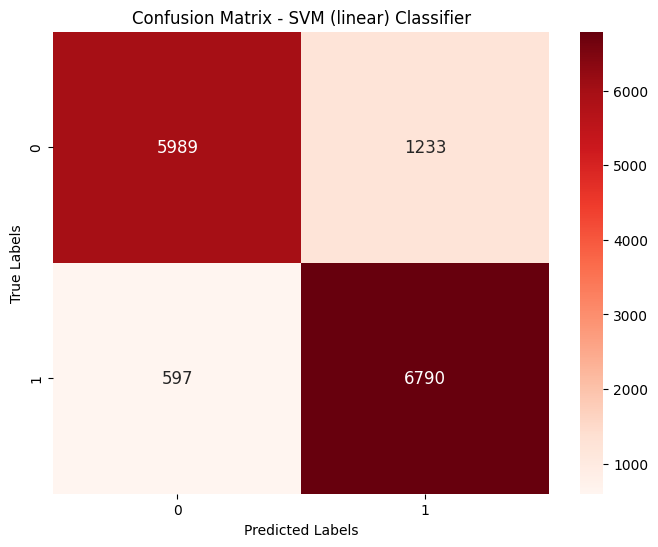

In [ ]:
# Generate confusion matrix
svm_cm = confusion_matrix(Y_test, Y_pred_fisher)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Reds', annot_kws={"size": 12})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - SVM (linear) Classifier')
plt.show()

In [ ]:
# Generate classification report
poly_classification_report = classification_report(Y_test, Y_pred_fisher)

# Display the classification report
print("Classification Report - SVM Classifier:")
print(poly_classification_report)

Classification Report - SVM Classifier:
              precision    recall  f1-score   support

           0       0.91      0.83      0.87      7222
           1       0.85      0.92      0.88      7387

    accuracy                           0.87     14609
   macro avg       0.88      0.87      0.87     14609
weighted avg       0.88      0.87      0.87     14609



In [ ]:
from snapml import LogisticRegression

snapml_logis=LogisticRegression(penalty='l2',random_state=31)
t0 = time.time()
X_train_array = X_train.values

snap_svm = snapml_logis.fit(X_train_array, Y_train)
snapml_time = time.time() - t0
print("[Snap ML] Training time (s):  {0:.2f}".format(snapml_time))

X_test_array = X_test.values
snapml_pred=snapml_logis.predict(X_test_array)
snapml_pred[0:5]
acc_snapml3  = roc_auc_score(Y_test, snapml_pred)
print("[Snap ML] ROC-AUC score:   {0:.3f}".format(acc_snapml3))

[Snap ML] Training time (s):  0.66
[Snap ML] ROC-AUC score:   0.880


## Conclusion and Notes on Dimensionality Reduction Methods for SVM Classification

From the EDA and model selection part we can clearly identify duration playing an important attribute in defining the outcome of our dataset. It is absolute that the more the leads are interested in starting a deposit will have higher number of calls and the call duration will be higher than the average. We have also figured out that job and education also acts as a crucial deciding factor and influences the outcome alot.

Here are the few recommendations for the bank than can help improve the deposit rate

* Classify job roles based on corporate tiers and approach all tier 1 employees within few days after the campaign commences
* Listen to the leads and extract more information to deliver the best deposit plan, which can increase the duration of calls and that can lead to a deposit
* Approaching the leads during the start of new bank period(May-July) will be a good choice as many have shown positive results from data history
* Tune the campaign according to the national econometrics, don't chanelize the expenses on campaign when the national economy is performing poor

In this study, five different dimensionality reduction methods were applied to preprocess the dataset before training a Support Vector Machine (SVM) classifier. The performance of the SVM classifier was evaluated in terms of accuracy on a held-out test set. Here are the findings and conclusions drawn from the experiment:

### 1. Correlation-based Feature Selection:
- **Method:** Features were selected based on their correlation with the target variable.
- **Accuracy:** SVM achieved an accuracy of 93% on the test set.
- **Conclusion:** Correlation-based feature selection proved to be highly effective, indicating that features strongly correlated with the target variable are crucial for classification.

### 2. Forward Selection with Limited Data:
- **Method:** Forward selection method was applied to select features using only 10,000 records from the dataset.
- **Accuracy:** SVM achieved an accuracy of 80% on the test set.
- **Conclusion:** While the accuracy is lower compared to correlation-based selection, forward selection with limited data still provided decent classification performance. It suggests that even with a reduced dataset, informative features can be selected.

### 3. Backward Selection with Limited Data:
- **Method:** Backward selection method was applied using only 100 records from the dataset.
- **Accuracy:** SVM achieved an accuracy of 70% on the test set.
- **Conclusion:** The accuracy dropped significantly with backward selection and limited data. This indicates that backward selection might not be suitable for datasets with a small number of samples.

### 4. Principal Component Analysis (PCA):
- **Method:** PCA was employed to reduce the dimensionality of the dataset to 10 principal components.
- **Accuracy:** SVM achieved an accuracy of 89% on the test set.
- **Conclusion:** PCA performed well in reducing the dimensionality while preserving the discriminatory information. However, it slightly underperformed compared to correlation-based feature selection.

### 5. Fisher Method (SelectKBest):
- **Method:** SelectKBest with Fisher method was applied to select the top K features.
- **Accuracy:** SVM achieved an accuracy of 87% on the test set.
- **Conclusion:** The Fisher method provided competitive results, indicating its effectiveness in selecting discriminative features for SVM classification.

### General Notes:
- **Impact of Dataset Size:** The performance of dimensionality reduction methods can be influenced by the size of the dataset. Methods like forward and backward selection may require sufficient data to identify informative features accurately.
- **Trade-off Between Accuracy and Computational Cost:** Some methods may provide higher accuracy but require more computational resources. It's essential to consider this trade-off, especially for large datasets.
- **Suitability of Methods:** The choice of dimensionality reduction method should consider the dataset size, characteristics, and computational constraints. Experimentation with multiple methods is crucial to determine the most suitable approach for a given dataset.

Overall, the experiment highlights the importance of selecting an appropriate dimensionality reduction method based on the dataset characteristics and desired classification performance. Further research could explore the combination of multiple methods or hybrid approaches for improved feature selection and classification accuracy.